In [1]:
# Importing  necssary libraries 

import pandas as pd
from pylab import *
import numpy as np
from matplotlib import dates
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pylab
import sys
import matplotlib.dates as mdates
from glob import glob

### Analysis for Weather station SWPM4 ###

In [2]:
# Reading data of station SWPM4 (from 2007 till 2019) and creating data frames
# the output is a list of data frames
# Using glob() method to read multiple files at once - the raw data is hourly for every year

filenames = glob('C:/Users/sdavedu/Desktop/XGBoost/Weather data/swpm4/swpm4*.txt')
dataframes_swpm4 = [pd.read_csv(f, delim_whitespace = True, header = 0, skiprows = 1,
                          dtype={'#yr': object, 'mo': object, 'dy': object, 'hr': object, 'mn': object}) 
              for f in filenames]

In [3]:
# Assigning the column names to all dataframes

for i in range(0, len(dataframes_swpm4)):
    dataframes_swpm4[i].columns = ['YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 
                                   'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'TIDE']

In [4]:
# Concatenating the list of dataframes to form a single dataframe

df_swpm4 = pd.concat(dataframes_swpm4, sort = False)

In [5]:
# Checking the data in the concatenated dataframe

df_swpm4.head()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2007,01,01,00,00,120,8.5,13.3,99.0,99.0,99.0,999,1005.8,1.3,999.0,999.0,99.0,99.0
1,2007,01,01,00,06,111,7.5,11.4,99.0,99.0,99.0,999,1005.5,1.3,999.0,999.0,99.0,99.0
2,2007,01,01,00,12,120,9.2,13.9,99.0,99.0,99.0,999,1005.3,1.3,999.0,999.0,99.0,99.0
3,2007,01,01,00,18,123,6.9,9.5,99.0,99.0,99.0,999,1005.6,1.4,999.0,999.0,99.0,99.0
4,2007,01,01,00,24,117,7.1,10.1,99.0,99.0,99.0,999,1005.2,1.3,999.0,999.0,99.0,99.0


In [6]:
df_swpm4.tail()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
86656,2020,12,31,23,30,219,3.9,5.8,99.0,99.0,99.0,999,1023.1,-2.4,1.8,999.0,99.0,99.0
86657,2020,12,31,23,36,216,3.7,5.8,99.0,99.0,99.0,999,1023.3,-2.4,1.8,999.0,99.0,99.0
86658,2020,12,31,23,42,224,5.2,7.2,99.0,99.0,99.0,999,1023.5,-2.5,1.8,999.0,99.0,99.0
86659,2020,12,31,23,48,228,5.4,7.0,99.0,99.0,99.0,999,1023.6,-2.5,1.8,999.0,99.0,99.0
86660,2020,12,31,23,54,225,4.5,6.1,99.0,99.0,99.0,999,1023.6,-2.5,1.8,999.0,99.0,99.0


### 2. Explaratory Data Analysis - swpm4

In [7]:
#Checking the information of the dataframe
df_swpm4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1166647 entries, 0 to 86660
Data columns (total 18 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   YY      1166647 non-null  object 
 1   MM      1166647 non-null  object 
 2   DD      1166647 non-null  object 
 3   hh      1166647 non-null  object 
 4   mm      1166647 non-null  object 
 5   WDIR    1166647 non-null  int64  
 6   WSPD    1166647 non-null  float64
 7   GST     1166647 non-null  float64
 8   WVHT    1166647 non-null  float64
 9   DPD     1166647 non-null  float64
 10  APD     1166647 non-null  float64
 11  MWD     1166647 non-null  int64  
 12  PRES    1166647 non-null  float64
 13  ATMP    1166647 non-null  float64
 14  WTMP    1166647 non-null  float64
 15  DEWP    1166647 non-null  float64
 16  VIS     1166647 non-null  float64
 17  TIDE    1166647 non-null  float64
dtypes: float64(11), int64(2), object(5)
memory usage: 169.1+ MB


In [8]:
# Displaying the distribution of all numerical variables

df_swpm4.describe()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
count,1.166647e+06,1.166647e+06,1.166647e+06,1166647.0,1166647.0,1166647.0,1166647.0,1.166647e+06,1.166647e+06,1.166647e+06,1166647.0,1166647.0,1166647.0
mean,2.092883e+02,5.473005e+00,6.982165e+00,99.0,99.0,99.0,999.0,1.110020e+03,2.588690e+01,8.367492e+02,999.0,99.0,99.0
std,1.461851e+02,1.329575e+01,1.388553e+01,0.0,0.0,0.0,0.0,9.195572e+02,1.403962e+02,3.667431e+02,0.0,0.0,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,99.0,99.0,99.0,999.0,9.747000e+02,-3.190000e+01,2.000000e-01,999.0,99.0,99.0
25%,1.050000e+02,1.900000e+00,2.600000e+00,99.0,99.0,99.0,999.0,1.010100e+03,-1.900000e+00,9.990000e+02,999.0,99.0,99.0
50%,2.150000e+02,3.200000e+00,4.400000e+00,99.0,99.0,99.0,999.0,1.015300e+03,6.400000e+00,9.990000e+02,999.0,99.0,99.0
75%,2.910000e+02,5.000000e+00,6.900000e+00,99.0,99.0,99.0,999.0,1.020300e+03,1.540000e+01,9.990000e+02,999.0,99.0,99.0
max,9.990000e+02,9.900000e+01,9.900000e+01,99.0,99.0,99.0,999.0,9.999000e+03,9.990000e+02,9.990000e+02,999.0,99.0,99.0


In [9]:
# Replacing bad data/missing values(99, 999 and 9999...) by NaN 
df_swpm4.replace(99,np.nan,inplace=True)
df_swpm4.replace(999,np.nan,inplace=True)
df_swpm4.replace(99.0,np.nan,inplace=True)
df_swpm4.replace(999.0,np.nan,inplace=True)
df_swpm4.replace(9999.0,np.nan,inplace=True)

In [10]:
# Combining 'YY', 'MM', 'DD', 'hh' and 'mm' features to form a Pandas datetime feature

df_swpm4["dateTime"] = df_swpm4["YY"].astype(str) + df_swpm4["MM"].astype(str) + df_swpm4["DD"].astype(str) + df_swpm4["hh"].astype(str) + df_swpm4["mm"].astype(str)
# convert the datetime to a list
dfList = df_swpm4["dateTime"].tolist()
# create a new empty list to hold true datetime values
dateList = []
# run datetime function
for d in dfList:
    dates = datetime.strptime(d, '%Y%m%d%H%M')
    dateList.append(dates)
#a = ["YYMMDDhhmm"]
#dateListnew = a + dateList
# add the list as a new column to the dataframe
df_swpm4["dateTime"] = dateList

In [11]:
df_swpm4.head()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,dateTime
0,2007,01,01,00,00,120.0,8.5,13.3,NaN,NaN,NaN,NaN,1005.8,1.3,NaN,NaN,NaN,NaN,2007-01-01 00:00:00
1,2007,01,01,00,06,111.0,7.5,11.4,NaN,NaN,NaN,NaN,1005.5,1.3,NaN,NaN,NaN,NaN,2007-01-01 00:06:00
2,2007,01,01,00,12,120.0,9.2,13.9,NaN,NaN,NaN,NaN,1005.3,1.3,NaN,NaN,NaN,NaN,2007-01-01 00:12:00
3,2007,01,01,00,18,123.0,6.9,9.5,NaN,NaN,NaN,NaN,1005.6,1.4,NaN,NaN,NaN,NaN,2007-01-01 00:18:00
4,2007,01,01,00,24,117.0,7.1,10.1,NaN,NaN,NaN,NaN,1005.2,1.3,NaN,NaN,NaN,NaN,2007-01-01 00:24:00


In [12]:
# Dropping YY,MM,DD,hh,mm columns since we have the datetime feature

df_swpm4 = df_swpm4.drop(['YY', 'MM', 'DD', 'hh', 'mm'], axis = 1)
df_swpm4.head()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,dateTime
0,120.0,8.5,13.3,NaN,NaN,NaN,NaN,1005.8,1.3,NaN,NaN,NaN,NaN,2007-01-01 00:00:00
1,111.0,7.5,11.4,NaN,NaN,NaN,NaN,1005.5,1.3,NaN,NaN,NaN,NaN,2007-01-01 00:06:00
2,120.0,9.2,13.9,NaN,NaN,NaN,NaN,1005.3,1.3,NaN,NaN,NaN,NaN,2007-01-01 00:12:00
3,123.0,6.9,9.5,NaN,NaN,NaN,NaN,1005.6,1.4,NaN,NaN,NaN,NaN,2007-01-01 00:18:00
4,117.0,7.1,10.1,NaN,NaN,NaN,NaN,1005.2,1.3,NaN,NaN,NaN,NaN,2007-01-01 00:24:00


In [13]:
# Setting the dateTime feature as an index

df_swpm4 = df_swpm4.set_index(['dateTime'])
df_swpm4.head()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
dateTime,,,,,,,,,,,,,
2007-01-01 00:00:00,120.0,8.5,13.3,NaN,NaN,NaN,NaN,1005.8,1.3,NaN,NaN,NaN,NaN
2007-01-01 00:06:00,111.0,7.5,11.4,NaN,NaN,NaN,NaN,1005.5,1.3,NaN,NaN,NaN,NaN
2007-01-01 00:12:00,120.0,9.2,13.9,NaN,NaN,NaN,NaN,1005.3,1.3,NaN,NaN,NaN,NaN
2007-01-01 00:18:00,123.0,6.9,9.5,NaN,NaN,NaN,NaN,1005.6,1.4,NaN,NaN,NaN,NaN
2007-01-01 00:24:00,117.0,7.1,10.1,NaN,NaN,NaN,NaN,1005.2,1.3,NaN,NaN,NaN,NaN


In [14]:
# Grouping the data at a daily level since the current observations are at a 6 minute interval
# Every record contains the mean value for the day across all years

df_swpm4_d = df_swpm4.resample('D').mean()
df_swpm4_clim = df_swpm4_d.groupby(df_swpm4_d.index.dayofyear).mean()
df_swpm4_clim.index = pd.to_datetime(df_swpm4_clim.index,format='%j')

In [15]:
print(df_swpm4_d.shape)
print(df_swpm4_clim.shape)

(5114, 13)
(366, 13)


In [16]:
#Checking the mising data in the dataframe
#"True" indicates missing value and "False" indicates no missing values
missing_data = df_swpm4.isnull()
missing_data.head()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
dateTime,,,,,,,,,,,,,
2007-01-01 00:00:00,False,False,False,True,True,True,True,False,False,True,True,True,True
2007-01-01 00:06:00,False,False,False,True,True,True,True,False,False,True,True,True,True
2007-01-01 00:12:00,False,False,False,True,True,True,True,False,False,True,True,True,True
2007-01-01 00:18:00,False,False,False,True,True,True,True,False,False,True,True,True,True
2007-01-01 00:24:00,False,False,False,True,True,True,True,False,False,True,True,True,True


In [17]:
#counting the missing values in all features.
#True indicates missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

WDIR
False    1137852
True       28795
Name: WDIR, dtype: int64

WSPD
False    1144308
True       22339
Name: WSPD, dtype: int64

GST
False    1142044
True       24603
Name: GST, dtype: int64

WVHT
True    1166647
Name: WVHT, dtype: int64

DPD
True    1166647
Name: DPD, dtype: int64

APD
True    1166647
Name: APD, dtype: int64

MWD
True    1166647
Name: MWD, dtype: int64

PRES
False    1153425
True       13222
Name: PRES, dtype: int64

ATMP
False    1142999
True       23648
Name: ATMP, dtype: int64

WTMP
True     975671
False    190976
Name: WTMP, dtype: int64

DEWP
True    1166647
Name: DEWP, dtype: int64

VIS
True    1166647
Name: VIS, dtype: int64

TIDE
True    1166647
Name: TIDE, dtype: int64



In [18]:
# Dropping the features with mostly missing values 

df_swpm4_d = df_swpm4_d.drop(['WVHT', 'DPD', 'APD', 'MWD', 'WTMP', 'DEWP', 'VIS', 'TIDE'], axis = 1)

In [19]:
# Reading the Ice data using glob package into a list of dataframes
# Raw data has Ice cover values for the 4 stations and mean ice coverage from years 2004 to 2020
# the output is a list of dataframes

filenames = glob('C:/Users/sdavedu/Desktop/XGBoost/Ice data/timeseries*.xlsx')
dataframes_ice = [pd.read_excel(f, index_col = 0, header = 0) for f in filenames]

In [20]:
#Concatenating the dataframes into a single dataframe
df_ice_swpm4 = pd.concat(dataframes_ice, sort = False)
df_ice_swpm4.head()

,mean_icecoverage,LTRM,SWPM,WNEM,DTLM
date,,,,,
2007-01-01,8.622266,10.002140,4.997253,4.997253,4.997253
2007-01-02,8.939786,8.003235,4.997253,10.002140,4.997253
2007-01-03,9.526155,7.003784,4.997253,14.999390,4.997253
2007-01-04,9.842561,4.997253,4.997253,19.996639,4.997253
2007-01-05,7.551686,3.997803,3.997803,14.999390,3.997803


In [21]:
df_ice_swpm4.tail()

,mean_icecoverage,LTRM,SWPM,WNEM,DTLM
date,,,,,
2020-05-19,0.0,0.0,0.0,0.0,0.0
2020-05-20,0.0,0.0,0.0,0.0,0.0
2020-05-21,0.0,0.0,0.0,0.0,0.0
2020-05-22,0.0,0.0,0.0,0.0,0.0
2020-05-23,0.0,0.0,0.0,0.0,0.0


In [22]:
df_ice_swpm4.describe()

,mean_icecoverage,LTRM,SWPM,WNEM,DTLM
count,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000
mean,44.424263,44.648016,46.084694,46.439591,33.109071
std,43.082660,46.133818,46.444855,47.192298,43.198345
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.250244,19.996639,19.996639,19.996639,0.000000
75%,93.285090,99.998466,99.998466,99.998466,89.996338
max,99.998464,99.998466,99.998466,99.998466,99.998466


In [23]:
# Retaining just the Ice cover of the station swpm4 from the ice dataframe i.e. retaining only "SWPM" column

df_ice_swpm4 = df_ice_swpm4.drop(['mean_icecoverage', 'DTLM', 'LTRM', 'WNEM'], axis = 1)

In [24]:
# Merging the weather station dataframe with the ice dataframe

df_merge = pd.merge(df_swpm4_d, df_ice_swpm4, how = 'inner', left_index = True, right_index = True)
df_merge.head()

,WDIR,WSPD,GST,PRES,ATMP,SWPM
2007-01-01,208.012605,5.865417,8.043333,1002.353975,2.142500,4.997253
2007-01-02,256.958333,5.221667,6.771250,1019.660833,1.710879,4.997253
2007-01-03,210.754167,5.047083,6.806667,1011.819167,3.328750,4.997253
2007-01-04,196.287500,3.697500,5.389167,1004.928750,5.199167,4.997253
2007-01-05,208.408333,2.765833,3.684167,1001.175107,5.097917,3.997803


In [25]:
df_merge.tail()

,WDIR,WSPD,GST,PRES,ATMP,SWPM
2020-05-19,102.567227,4.286250,6.390833,1022.008403,15.937179,0.0
2020-05-20,117.465812,3.380417,5.032500,1023.730085,16.005603,0.0
2020-05-21,117.125523,2.621250,3.830000,1021.585957,15.099561,0.0
2020-05-22,106.737288,1.905042,2.841176,1017.158190,17.347137,0.0
2020-05-23,143.535565,2.506695,3.763598,1015.124370,18.537255,0.0


In [26]:
#In addition to the numeric values, WDIR - wind direction has the direction labels as well. i.e. North-West, South etc.
#Analysing these directions here

def label_wdir(data):
    if data['WDIR'] == 0.0 :
        return 'North'
    if data['WDIR'] == 90.0 :
        return 'East'
    if data['WDIR'] == 180.0 :
        return 'South'
    if data['WDIR'] == 270.0 :
        return 'West'
    if 0 < data['WDIR'] < 90 :
        return 'North-East'
    if 90 < data['WDIR'] < 180 :
        return 'South-East'
    if 180 < data['WDIR'] < 270 :
        return 'South-West'
    if 270 < data['WDIR'] < 360 :
        return 'North-West'
    return 'Unknown'
df_merge['Direction'] = df_merge.apply(lambda data: label_wdir(data), axis = 1)

In [27]:
df_merge['Direction'].value_counts()

South-East    1452
South-West    1239
North-West     507
North-East      80
Unknown         15
Name: Direction, dtype: int64

In [28]:
df_merge = df_merge[df_merge['Direction'] != 'Unknown']

In [29]:
#Breaking WDIR into degrees in specific directions 

def wind_magnitude(data) :
    if 90 < data['WDIR'] < 180:
        return data['WDIR']-90
    if 180 < data['WDIR'] < 270:
        return data['WDIR']-180
    if 270 < data['WDIR'] < 360:
        return data['WDIR']-270
    return data['WDIR']

df_merge['WDIR_New'] = df_merge.apply(lambda data: wind_magnitude(data), axis = 1)

df_merge['WDIR_New'].describe()

count    3278.000000
mean       42.394884
std        25.736094
min         0.025210
25%        19.879669
50%        39.751085
75%        64.308298
max        89.948905
Name: WDIR_New, dtype: float64

In [30]:
df_merge = pd.get_dummies(df_merge, prefix=['Wind'], columns = ['Direction'], drop_first=True)
df_merge.head()

,WDIR,WSPD,GST,PRES,ATMP,SWPM,WDIR_New,Wind_North-West,Wind_South-East,Wind_South-West
2007-01-01,208.012605,5.865417,8.043333,1002.353975,2.142500,4.997253,28.012605,0,0,1
2007-01-02,256.958333,5.221667,6.771250,1019.660833,1.710879,4.997253,76.958333,0,0,1
2007-01-03,210.754167,5.047083,6.806667,1011.819167,3.328750,4.997253,30.754167,0,0,1
2007-01-04,196.287500,3.697500,5.389167,1004.928750,5.199167,4.997253,16.287500,0,0,1
2007-01-05,208.408333,2.765833,3.684167,1001.175107,5.097917,3.997803,28.408333,0,0,1


In [31]:
df_merge = df_merge.drop(['WDIR'], axis = 1)
df_merge.head()

,WSPD,GST,PRES,ATMP,SWPM,WDIR_New,Wind_North-West,Wind_South-East,Wind_South-West
2007-01-01,5.865417,8.043333,1002.353975,2.142500,4.997253,28.012605,0,0,1
2007-01-02,5.221667,6.771250,1019.660833,1.710879,4.997253,76.958333,0,0,1
2007-01-03,5.047083,6.806667,1011.819167,3.328750,4.997253,30.754167,0,0,1
2007-01-04,3.697500,5.389167,1004.928750,5.199167,4.997253,16.287500,0,0,1
2007-01-05,2.765833,3.684167,1001.175107,5.097917,3.997803,28.408333,0,0,1


In [32]:
df_merge.shape

(3278, 9)

#### 3. XGBoost Model development for SWPM4

In [33]:
######### Creating lags and moving averages for Ice cover (SWPM) and Air Temperature(ATMP) features ################

for i in range(1,6):
    col = 'ATMP_lag_' + str(i)
    df_merge[col] = df_merge['ATMP'].shift(i)

for i in range(1,6):
    col = 'Ice_lag_' + str(i)
    df_merge[col] = df_merge['SWPM'].shift(i)

for i in range(3,6):
    col = 'ATMP_RM_' + str(i)
    df_merge[col] = df_merge['ATMP'].rolling(i).mean()
    df_merge[col] = df_merge[col].shift(1)

for i in range(3,6):
    col = 'Ice_RM_' + str(i)
    df_merge[col] = df_merge['SWPM'].rolling(i).mean()
    df_merge[col] = df_merge[col].shift(1)

df_merge.head()

,WSPD,GST,PRES,ATMP,SWPM,WDIR_New,Wind_North-West,Wind_South-East,Wind_South-West,ATMP_lag_1,...,Ice_lag_2,Ice_lag_3,Ice_lag_4,Ice_lag_5,ATMP_RM_3,ATMP_RM_4,ATMP_RM_5,Ice_RM_3,Ice_RM_4,Ice_RM_5
2007-01-01,5.865417,8.043333,1002.353975,2.142500,4.997253,28.012605,0,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-02,5.221667,6.771250,1019.660833,1.710879,4.997253,76.958333,0,0,1,2.142500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03,5.047083,6.806667,1011.819167,3.328750,4.997253,30.754167,0,0,1,1.710879,...,4.997253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,3.697500,5.389167,1004.928750,5.199167,4.997253,16.287500,0,0,1,3.328750,...,4.997253,4.997253,NaN,NaN,2.394043,NaN,NaN,4.997253,NaN,NaN
2007-01-05,2.765833,3.684167,1001.175107,5.097917,3.997803,28.408333,0,0,1,5.199167,...,4.997253,4.997253,4.997253,NaN,3.412932,3.095324,NaN,4.997253,4.997253,NaN


In [34]:
df_merge['PRES'].describe()

count    3275.000000
mean     1015.001909
std         7.944112
min       984.687029
25%      1009.895802
50%      1015.334583
75%      1020.397912
max      1039.227426
Name: PRES, dtype: float64

In [35]:
# For Pressure feature, creating z-score as an additional feature
cols = ['PRES']

for col in cols:
    col_zscore = col + '_zscore'
    df_merge[col_zscore] = (df_merge[col] - df_merge[col].mean())/df_merge[col].std(ddof=0)

df_merge.head()

,WSPD,GST,PRES,ATMP,SWPM,WDIR_New,Wind_North-West,Wind_South-East,Wind_South-West,ATMP_lag_1,...,Ice_lag_3,Ice_lag_4,Ice_lag_5,ATMP_RM_3,ATMP_RM_4,ATMP_RM_5,Ice_RM_3,Ice_RM_4,Ice_RM_5,PRES_zscore
2007-01-01,5.865417,8.043333,1002.353975,2.142500,4.997253,28.012605,0,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.592357
2007-01-02,5.221667,6.771250,1019.660833,1.710879,4.997253,76.958333,0,0,1,2.142500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.586552
2007-01-03,5.047083,6.806667,1011.819167,3.328750,4.997253,30.754167,0,0,1,1.710879,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.400703
2007-01-04,3.697500,5.389167,1004.928750,5.199167,4.997253,16.287500,0,0,1,3.328750,...,4.997253,NaN,NaN,2.394043,NaN,NaN,4.997253,NaN,NaN,-1.268197
2007-01-05,2.765833,3.684167,1001.175107,5.097917,3.997803,28.408333,0,0,1,5.199167,...,4.997253,4.997253,NaN,3.412932,3.095324,NaN,4.997253,4.997253,NaN,-1.740775


In [36]:
df_merge[['WSPD', 'GST', 'PRES', 'ATMP', 'SWPM', 'PRES_zscore']].head()

,WSPD,GST,PRES,ATMP,SWPM,PRES_zscore
2007-01-01,5.865417,8.043333,1002.353975,2.142500,4.997253,-1.592357
2007-01-02,5.221667,6.771250,1019.660833,1.710879,4.997253,0.586552
2007-01-03,5.047083,6.806667,1011.819167,3.328750,4.997253,-0.400703
2007-01-04,3.697500,5.389167,1004.928750,5.199167,4.997253,-1.268197
2007-01-05,2.765833,3.684167,1001.175107,5.097917,3.997803,-1.740775


In [37]:
df_merge_ice_on_off = df_merge[['WSPD', 'GST', 'PRES', 'ATMP', 'SWPM']]
df_merge_ice_on_off.head(10)

,WSPD,GST,PRES,ATMP,SWPM
2007-01-01,5.865417,8.043333,1002.353975,2.142500,4.997253
2007-01-02,5.221667,6.771250,1019.660833,1.710879,4.997253
2007-01-03,5.047083,6.806667,1011.819167,3.328750,4.997253
2007-01-04,3.697500,5.389167,1004.928750,5.199167,4.997253
2007-01-05,2.765833,3.684167,1001.175107,5.097917,3.997803
2007-01-06,4.966807,6.004202,1005.837395,2.306303,2.998352
2007-01-07,4.228358,6.145522,1014.648507,2.277444,0.999451
2007-01-08,6.062500,7.911667,1001.243612,0.033333,0.000000
2007-01-09,9.000833,11.838750,1005.890417,-3.990000,1.998901
2007-01-10,3.183333,4.264583,1019.709583,-8.780000,2.998352


In [38]:
df_merge_ice_on_off['month'] = pd.DatetimeIndex(df_merge_ice_on_off.index).month
df_merge_ice_on_off['year'] = pd.DatetimeIndex(df_merge_ice_on_off.index).year
df_merge_ice_on_off['day'] = pd.DatetimeIndex(df_merge_ice_on_off.index).day

df_merge_ice_on_off['Ice_RM_3'] = df_merge_ice_on_off['SWPM'].rolling(3).mean()

df_ice_off = df_merge_ice_on_off[(df_merge_ice_on_off['month'] <= 7) & (df_merge_ice_on_off['month'] > 1)]
df_ice_on = df_merge_ice_on_off[(df_merge_ice_on_off['month'] > 7)]

df_ice_on['Ice_on_off'] = np.where(df_ice_on['Ice_RM_3'] >= 10, 'Ice_on_date', 'Normal')
df_ice_on = df_ice_on[df_ice_on['Ice_on_off'] != 'Normal']
df_ice_on = df_ice_on.drop_duplicates(subset=['year', 'Ice_on_off'], keep='first')

df_ice_off['Ice_on_off'] = np.where((df_ice_off['month'] > 3) & (df_ice_off['Ice_RM_3'] <= 10), 'Ice_off_date', 'Normal')
df_ice_off = df_ice_off[df_ice_off['Ice_on_off'] != 'Normal']
df_ice_off = df_ice_off.drop_duplicates(subset=['year', 'Ice_on_off'], keep='first')

df_merge_ice_on_off = pd.concat([df_ice_off, df_ice_on], axis = 0)
df_merge_ice_on_off = df_merge_ice_on_off.reset_index()
df_merge_ice_on_off = df_merge_ice_on_off.sort_values(by = 'index')
df_merge_ice_on_off = df_merge_ice_on_off.set_index('index')

df_merge_ice_on_off = df_merge_ice_on_off[df_merge_ice_on_off['Ice_on_off'] != 'Normal']

df_merge_ice_on_off

<ipython-input-38-185ec06194a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_ice_on_off['month'] = pd.DatetimeIndex(df_merge_ice_on_off.index).month
<ipython-input-38-185ec06194a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_ice_on_off['year'] = pd.DatetimeIndex(df_merge_ice_on_off.index).year
<ipython-input-38-185ec06194a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,WSPD,GST,PRES,ATMP,SWPM,month,year,day,Ice_RM_3,Ice_on_off
index,,,,,,,,,,
2007-05-02,2.125523,2.795378,1018.742083,9.249167,10.002140,5,2007,2,9.999593,Ice_off_date
2007-12-09,3.709167,4.671250,1028.338750,-6.140417,80.001831,12,2007,9,26.667277,Ice_on_date
2008-04-25,4.921250,7.016456,1012.850833,10.982022,4.997253,4,2008,25,9.997048,Ice_off_date
2008-12-10,2.180833,2.887917,1021.596250,-13.492917,40.000919,12,2008,10,13.333640,Ice_on_date
2009-04-02,2.491250,3.604167,1007.183333,3.397500,4.997253,4,2009,2,8.333844,Ice_off_date
2009-12-11,10.919665,13.501261,1010.352301,-9.902510,10.002140,12,2009,11,10.002140,Ice_on_date
2010-04-08,5.314286,7.397059,1006.531224,0.728692,4.997253,4,2010,8,4.997253,Ice_off_date
2010-12-14,5.735747,8.116290,1017.717500,-14.173333,80.001831,12,2010,14,29.998779,Ice_on_date
2011-04-18,5.155085,6.887288,1013.490254,-3.246610,0.000000,4,2011,18,6.665546,Ice_off_date


In [39]:
df_ice = pd.concat(dataframes_ice, sort = False)
df_ice = df_ice.reset_index()
df_ice.head()

,date,mean_icecoverage,LTRM,SWPM,WNEM,DTLM
0,2007-01-01,8.622266,10.002140,4.997253,4.997253,4.997253
1,2007-01-02,8.939786,8.003235,4.997253,10.002140,4.997253
2,2007-01-03,9.526155,7.003784,4.997253,14.999390,4.997253
3,2007-01-04,9.842561,4.997253,4.997253,19.996639,4.997253
4,2007-01-05,7.551686,3.997803,3.997803,14.999390,3.997803


In [40]:
# Importing packages for XGBoost and K-fold Gridsearch

import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [41]:
# Separating the Independent and dependent variables

X = df_merge.drop(['SWPM'], axis = 1)
y = df_merge['SWPM']

# Creating training and validation data for model building

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)

In [42]:
X_train = X['2007-01-01':'2015-12-31']
X_test = X['2016-01-01':'2019-12-31']
y_train = y['2007-01-01':'2015-12-31']
y_test = y['2016-01-01':'2019-12-31']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2165, 25) (2165,)
(969, 25) (969,)


In [43]:
X_valid = X['2020-01-01':'2020-12-31']
y_valid = y['2020-01-01':'2020-12-31']

In [44]:
# Running the XGBoost regressor with a wide range of hyper parameters and 5 CV timeseries splits

t0 = time.time()

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3, 4, 5],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

tF = time.time()

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

print('Time to train = %.2f seconds' % (tF - t0))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.4min finished


0.9312436061294742
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.8}
Time to train = 83.62 seconds


In [45]:
# Predicting on the training data and calculating the mean absolute error

y_train_pred = xgb_grid.predict(X_train)

print(mean_absolute_error(y_train, y_train_pred))

3.1225977754315006


In [46]:
# Predicting on the test data and calculating the mean absolute error

y_test_pred = xgb_grid.predict(X_test)

print(mean_absolute_error(y_test, y_test_pred))

5.641773561517429


In [47]:
# Predicting on the validation data and calculating the mean absolute error

y_valid_pred = xgb_grid.predict(X_valid)

print(mean_absolute_error(y_valid, y_valid_pred))

5.397345940284948


In [48]:
df_train = X_train.copy()
df_train['y_train'] = y_train
df_train['y_train_pred'] = y_train_pred

df_test = X_test.copy()
df_test['y_test'] = y_test
df_test['y_test_pred'] = y_test_pred

df_valid = X_valid.copy()
df_valid['y_valid'] = y_valid
df_valid['y_valid_pred'] = y_valid_pred

In [49]:
df_test = df_test[['WSPD', 'GST', 'PRES', 'ATMP', 'y_test', 'y_test_pred']]
df_valid = df_valid[['WSPD', 'GST', 'PRES', 'ATMP', 'y_valid', 'y_valid_pred']]
df_train = df_train[['WSPD', 'GST', 'PRES', 'ATMP', 'y_train', 'y_train_pred']]

df_test.columns = ['WSPD', 'GST', 'PRES', 'ATMP', 'SWPM', 'SWPM_Pred']
df_valid.columns = ['WSPD', 'GST', 'PRES', 'ATMP', 'SWPM', 'SWPM_Pred']
df_train.columns = ['WSPD', 'GST', 'PRES', 'ATMP', 'SWPM', 'SWPM_Pred']


df_test['SWPM_Pred_RM_3'] = df_test['SWPM_Pred'].rolling(3).mean()
#df_test['SWPM_Pred_RM_3'] = df_test['SWPM_Pred_RM_3'].shift(1)

df_valid['SWPM_Pred_RM_3'] = df_valid['SWPM_Pred'].rolling(3).mean()

df_train['SWPM_Pred_RM_3'] = df_train['SWPM_Pred'].rolling(3).mean()
#df_train['SWPM_Pred_RM_3'] = df_train['SWPM_Pred_RM_3'].shift(1)

df_ml = pd.concat([df_train, df_test, df_valid], axis = 0)
df_ml.head()

,WSPD,GST,PRES,ATMP,SWPM,SWPM_Pred,SWPM_Pred_RM_3
2007-01-01,5.865417,8.043333,1002.353975,2.142500,4.997253,13.984228,NaN
2007-01-02,5.221667,6.771250,1019.660833,1.710879,4.997253,-0.312593,NaN
2007-01-03,5.047083,6.806667,1011.819167,3.328750,4.997253,1.928293,5.199976
2007-01-04,3.697500,5.389167,1004.928750,5.199167,4.997253,6.297529,2.637743
2007-01-05,2.765833,3.684167,1001.175107,5.097917,3.997803,6.828722,5.018181


In [50]:
df_ml.tail()

,WSPD,GST,PRES,ATMP,SWPM,SWPM_Pred,SWPM_Pred_RM_3
2020-05-19,4.286250,6.390833,1022.008403,15.937179,0.0,0.175648,0.170895
2020-05-20,3.380417,5.032500,1023.730085,16.005603,0.0,0.175648,0.173271
2020-05-21,2.621250,3.830000,1021.585957,15.099561,0.0,0.175648,0.175648
2020-05-22,1.905042,2.841176,1017.158190,17.347137,0.0,0.175648,0.175648
2020-05-23,2.506695,3.763598,1015.124370,18.537255,0.0,0.196830,0.182709


In [51]:
df_ml['month'] = pd.DatetimeIndex(df_ml.index).month
df_ml['year'] = pd.DatetimeIndex(df_ml.index).year
df_ml['day'] = pd.DatetimeIndex(df_ml.index).day

df_ice_off = df_ml[(df_ml['month'] <= 7) & (df_ml['month'] > 1)]
df_ice_on = df_ml[(df_ml['month'] > 7)]

df_ice_on['Ice_on_off'] = np.where(df_ice_on['SWPM_Pred_RM_3'] >= 10, 'Ice_on_date', 'Normal')
df_ice_on = df_ice_on[df_ice_on['Ice_on_off'] != 'Normal']
df_ice_on = df_ice_on.drop_duplicates(subset=['year', 'Ice_on_off'], keep='first')

df_ice_off['Ice_on_off'] = np.where((df_ice_off['month'] > 3) & (df_ice_off['SWPM_Pred_RM_3'] <= 10), 'Ice_off_date', 'Normal')
df_ice_off = df_ice_off[df_ice_off['Ice_on_off'] != 'Normal']
df_ice_off = df_ice_off.drop_duplicates(subset=['year', 'Ice_on_off'], keep='first')

df_ml = pd.concat([df_ice_off, df_ice_on], axis = 0)
df_ml = df_ml.reset_index()
df_ml = df_ml.sort_values(by = 'index')
df_ml = df_ml.set_index('index')

df_ml

<ipython-input-51-4b61d8b5eb18>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ice_on['Ice_on_off'] = np.where(df_ice_on['SWPM_Pred_RM_3'] >= 10, 'Ice_on_date', 'Normal')
<ipython-input-51-4b61d8b5eb18>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ice_off['Ice_on_off'] = np.where((df_ice_off['month'] > 3) & (df_ice_off['SWPM_Pred_RM_3'] <= 10), 'Ice_off_date', 'Normal')


,WSPD,GST,PRES,ATMP,SWPM,SWPM_Pred,SWPM_Pred_RM_3,month,year,day,Ice_on_off
index,,,,,,,,,,,
2007-05-04,2.291250,3.469957,1025.862500,11.581250,3.997803,5.689005,9.224731,5,2007,4,Ice_off_date
2007-12-06,6.152917,7.883750,1016.318750,-6.655000,0.000000,14.414752,11.266221,12,2007,6,Ice_on_date
2008-04-26,6.921610,9.676695,1005.656780,7.868644,4.997253,6.139940,9.579510,4,2008,26,Ice_off_date
2008-12-11,4.034728,5.397490,1012.972385,-6.177824,29.998779,44.628506,21.011965,12,2008,11,Ice_on_date
2009-04-03,2.241250,3.059664,1003.199583,2.149583,4.997253,6.510177,9.846076,4,2009,3,Ice_off_date
2009-12-09,7.001688,9.557806,996.616102,-4.385593,10.002140,11.145140,10.155278,12,2009,9,Ice_on_date
2010-04-10,2.953138,4.012552,1019.162605,1.238235,4.997253,7.530654,9.774219,4,2010,10,Ice_off_date
2010-12-12,7.540741,10.482407,1012.244583,-9.585000,4.997253,17.176935,11.047609,12,2010,12,Ice_on_date
2011-04-21,3.913333,4.700000,1023.594583,2.508750,0.000000,0.634563,6.004897,4,2011,21,Ice_off_date


In [52]:
##################### Creating actual Ice duration dataframe #######################

df_merge_ice_on_off = df_merge_ice_on_off.reset_index()
df_merge_ice_on_off.rename(columns={'index':'Date'}, inplace = True)

df_ice_on = df_merge_ice_on_off[df_merge_ice_on_off['Ice_on_off'] == 'Ice_on_date']
df_ice_off = df_merge_ice_on_off[df_merge_ice_on_off['Ice_on_off'] == 'Ice_off_date']

df_ice_on.rename(columns={'Date':'Ice_on_date'}, inplace = True)
df_ice_off.rename(columns={'Date':'Ice_off_date'}, inplace = True)

df_ice_on = df_ice_on[['year', 'Ice_on_date']]
df_ice_off = df_ice_off[['year', 'Ice_off_date']]

df2 = {'year': 2015, 'Ice_on_date': '2015-12-15'}
df_ice_on = df_ice_on.append(df2, ignore_index = True)
df_ice_on['Ice_on_date'] = pd.to_datetime(df_ice_on['Ice_on_date'])
df_ice_on = df_ice_on.sort_values(by = ['year'])

df_actual_ice = df_ice_off.merge(df_ice_on, on = 'year', how = 'left')
df_actual_ice['Ice_off_date'] = pd.to_datetime(df_actual_ice['Ice_off_date'])
df_actual_ice['Ice_on_date'] = pd.to_datetime(df_actual_ice['Ice_on_date'])
df_actual_ice['duration'] = df_actual_ice['Ice_off_date'].shift(-1) - df_actual_ice['Ice_on_date']

##################### Creating predicted Ice duration dataframe #######################

df_ml = df_ml.reset_index()
df_ml.rename(columns={'index':'Date'}, inplace = True)

df_ice_on = df_ml[df_ml['Ice_on_off'] == 'Ice_on_date']
df_ice_off = df_ml[df_ml['Ice_on_off'] == 'Ice_off_date']

df_ice_on.rename(columns={'Date':'Ice_on_date'}, inplace = True)
df_ice_off.rename(columns={'Date':'Ice_off_date'}, inplace = True)

df_ice_on = df_ice_on[['year', 'Ice_on_date']]
df_ice_off = df_ice_off[['year', 'Ice_off_date']]

df2 = {'year': 2015, 'Ice_on_date': '2015-12-15'}
df_ice_on = df_ice_on.append(df2, ignore_index = True)
df_ice_on['Ice_on_date'] = pd.to_datetime(df_ice_on['Ice_on_date'])
df_ice_on = df_ice_on.sort_values(by = ['year'])

df_predicted_ice = df_ice_off.merge(df_ice_on, on = 'year', how = 'left')
df_predicted_ice['Ice_off_date'] = pd.to_datetime(df_predicted_ice['Ice_off_date'])
df_predicted_ice['Ice_on_date'] = pd.to_datetime(df_predicted_ice['Ice_on_date'])
df_predicted_ice['duration'] = df_predicted_ice['Ice_off_date'].shift(-1) - df_predicted_ice['Ice_on_date']
df_predicted_ice

C:\Users\sdavedu\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,year,Ice_off_date,Ice_on_date,duration
0,2007,2007-05-04,2007-12-06,142 days
1,2008,2008-04-26,2008-12-11,113 days
2,2009,2009-04-03,2009-12-09,122 days
3,2010,2010-04-10,2010-12-12,130 days
4,2011,2011-04-21,2011-12-23,100 days
5,2012,2012-04-01,2012-12-10,143 days
6,2013,2013-05-02,2013-11-26,166 days
7,2014,2014-05-11,2014-11-21,169 days
8,2015,2015-05-09,2015-12-15,108 days
9,2016,2016-04-01,2016-12-16,126 days


In [53]:
#to use in final merged code later on
df_icedur_pred_swpm4 = df_predicted_ice

In [54]:
#to use in final merged code later on
df_icedur_act_swpm4 = df_actual_ice

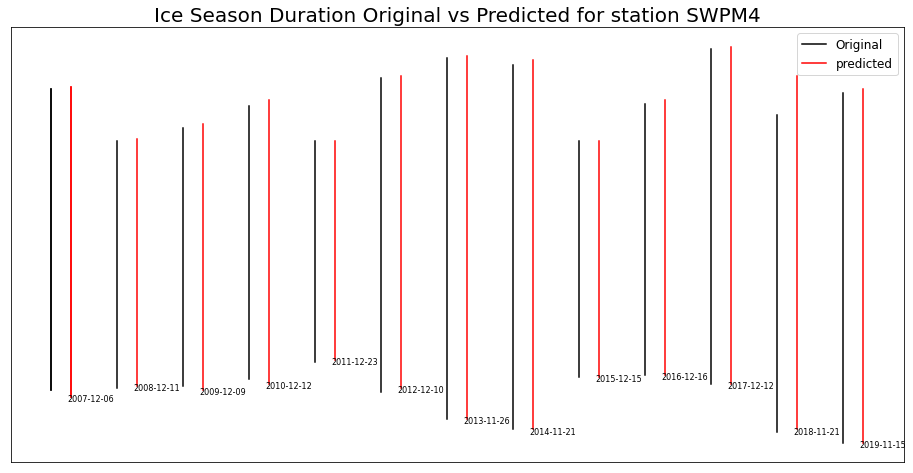

In [55]:
# Draw the Ice-on and Ice-off plots


df_original = df_actual_ice
df = df_predicted_ice

xValue_original = []
yValue_original = []
xValue = []
yValue = []
tick_spacing = 5

for i in range(1,len(df_original['year'])):
    if(int(df_original['Ice_off_date'][i].strftime("%m")) < 11):
        xValue_original.append(df_original['year'][i])
        xValue_original.append(df_original['year'][i])
    else:
        xValue_original.append(df_original['year'][i]+1)
        xValue_original.append(df_original['year'][i]+1)

for i in range(1,len(df['year'])):
    if(int(df['Ice_off_date'][i].strftime("%m")) < 11):
        xValue.append(df['year'][i])
        xValue.append(df['year'][i])
    else:
        xValue.append(df['year'][i]+1)
        xValue.append(df['year'][i]+1)
        
    
for i in range(0,(len(df_original['Ice_off_date'])-1)):
    if(int(df_original['Ice_on_date'][i].strftime("%m")) >= 11):
        start_date = datetime(int(df_original['Ice_on_date'][i].strftime("%Y")),11,1,0,0,0)
    yValue_original.append((df_original['Ice_on_date'][i]-start_date).days)
    yValue_original.append((df_original['Ice_off_date'][i+1]-start_date).days)

for i in range(0,(len(df['Ice_off_date'])-1)):
    if(int(df['Ice_on_date'][i].strftime("%m")) >= 11):
        start_date = datetime(int(df['Ice_on_date'][i].strftime("%Y")),11,1,0,0,0)
    else:
        start_date = datetime(int(df['Ice_on_date'][i].strftime("%Y"))-1,11,1,0,0,0)
    yValue.append((df['Ice_on_date'][i]-start_date).days)
    yValue.append((df['Ice_off_date'][i+1]-start_date).days)


      
plt.figure(figsize=(16,8))  

for i in range(0, int(len(xValue)/2)):

    plt.annotate(df['Ice_on_date'][i].strftime("%Y-%m-%d"),(xValue[2*i],yValue[2*i]), xytext=(xValue[2*i]+0.25,yValue[2*i] -2), fontsize=8)
#     plt.annotate(df['Ice_off_date'][i+1].strftime("%Y-%m-%d"),(xValue[2*i+1],yValue[2*i+1]), xytext=(xValue[2*i+1]-0.8,yValue[2*i+1]), fontsize=8)

    

# for i in range(0, int(len(xValue_original)/2)):
#     ice_on_point = plt.scatter(xValue_original[2*i], yValue_original[2*i], color = 'r', s=6. )
#     ice_off_point = plt.scatter(xValue_original[2*i+1], yValue_original[2*i+1], color = 'b', s=6.)
    
# for i in range(0, int(len(xValue)/2)):
#     ice_on_point = plt.scatter(xValue[2*i] + 0.3, yValue[2*i], color = 'y', s=6. )
#     ice_off_point = plt.scatter(xValue[2*i+1] + 0.3, yValue[2*i+1], color = 'g', s=6.)


# l2 = plt.legend([ice_on_point, ice_off_point], labels = ['Ice On Date', 'Ice Off Date'], bbox_to_anchor=(1.05, 0), loc=1, borderaxespad=0)            


    
for i in range(0, int(len(xValue_original)/2)):
    if(i==0):
        line1 = plt.plot([xValue_original[2*i], xValue_original[2*i+1]],[yValue_original[2*i], yValue_original[2*i+1]],  color ='k', label = 'Original')
        
    line1 = plt.plot([xValue_original[2*i], xValue_original[2*i+1]],[yValue_original[2*i], yValue_original[2*i+1]],  color ='k')

plt.legend()
    #     plt.annotate(df['Ice Duration'][i], ((xValue[2*i]+xValue[2*i+1])/2, (yValue[2*i]+yValue[2*i+1])/2), ((xValue[2*i]+xValue[2*i+1])/2+0.1, (yValue[2*i]+yValue[2*i+1])/2))
    
for j in range(0, int(len(xValue)/2)):
    if(j == 0):
        line2 = plt.plot([xValue[2*j] + 0.3, xValue[2*j+1]+0.3],[yValue[2*j], yValue[2*j+1]], label = 'predicted', color = 'r')
        
    line2 = plt.plot([xValue[2*j] + 0.3, xValue[2*j+1]+0.3],[yValue[2*j], yValue[2*j+1]], color = 'r')  

plt.legend(loc='upper right', fontsize = 12)
        
    
# plt.legend([line1, line2], labels=['Original', 'Predicted'], bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0)


# plt.gca().add_artist(l2)




plt.title('Ice Season Duration Original vs Predicted for station SWPM4' , fontsize=20)

# plt.axis('off')
plt.yticks([])


frame = plt.gca().axes.get_xaxis().set_visible(False)

plt.savefig('ICe_duration_SWPM4.png')

In [56]:
#df_ml.to_csv('predicted_ice_on_off.csv', index = True)

In [57]:
# Calculating variable importance as per the XGBoost model.

var_importance = pd.DataFrame(xgb_grid.best_estimator_.feature_importances_)
features = pd.DataFrame(X_test.columns)
df_var_imp = pd.concat([features, var_importance], axis = 1)
df_var_imp.columns = ['feature', 'importance']
df_var_imp = df_var_imp.sort_values(by = ['importance'], ascending = False)
df_var_imp = df_var_imp.set_index(['feature'])

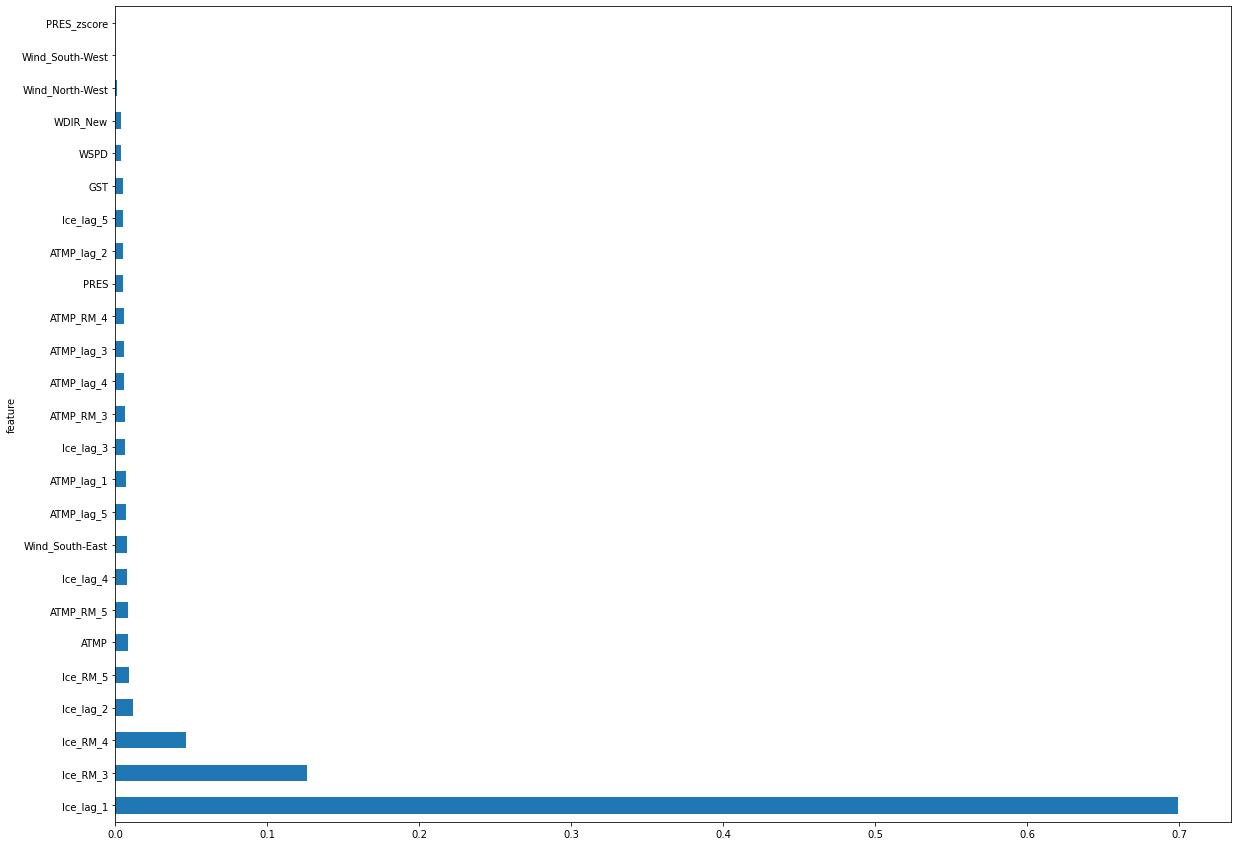

In [58]:
# Displaying the variable importance

%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 15))
#plt.figure(figsize=(10,10))
df_var_imp['importance'].plot(kind = 'barh')

In [59]:
print(df_var_imp)

                 importance
feature                    
Ice_lag_1          0.699262
Ice_RM_3           0.126092
Ice_RM_4           0.046489
Ice_lag_2          0.011490
Ice_RM_5           0.009160
ATMP               0.008674
ATMP_RM_5          0.008331
Ice_lag_4          0.007706
Wind_South-East    0.007629
ATMP_lag_5         0.007320
ATMP_lag_1         0.007046
Ice_lag_3          0.006563
ATMP_RM_3          0.006375
ATMP_lag_4         0.006125
ATMP_lag_3         0.005929
ATMP_RM_4          0.005587
PRES               0.005471
ATMP_lag_2         0.005411
Ice_lag_5          0.005234
GST                0.005226
WSPD               0.003890
WDIR_New           0.003700
Wind_North-West    0.001289
Wind_South-West    0.000000
PRES_zscore        0.000000


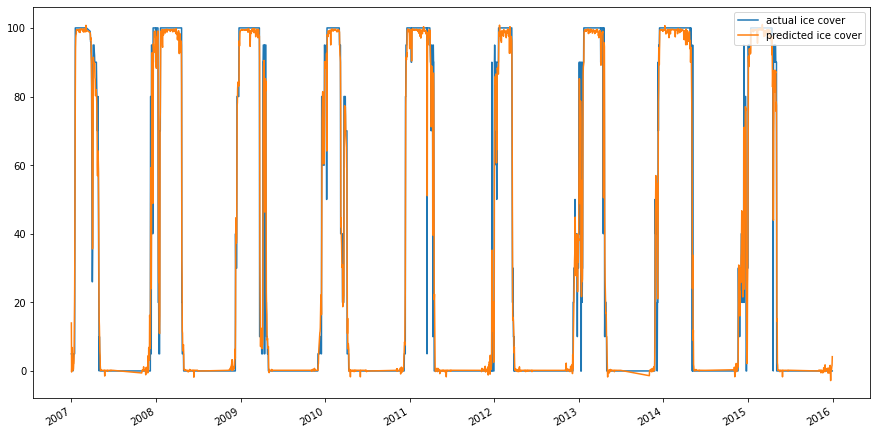

In [60]:
# Overlaying the training predictions on top of training data

plt.figure(figsize=(15,8))
df_train['SWPM'].plot(label = 'actual ice cover')
df_train['SWPM_Pred'].plot(label = 'predicted ice cover')
plt.legend(loc="upper right")

In [61]:
########################## Code for Baseline vs Actual vs Predicted Ice cover #######################

df_plot = pd.concat([df_train, df_test, df_valid], axis = 0)
df_plot = df_plot.drop(['WSPD', 'GST', 'PRES', 'ATMP', 'SWPM_Pred_RM_3'], axis = 1)
df_plot['year'] = df_plot.index.year
df_plot['month'] = df_plot.index.month
df_plot['day'] = df_plot.index.day

df_plot_2020 = df_plot[df_plot['year'] == 2020]
df_plot_rem = df_plot[df_plot['year'] <= 2019]

res = pd.DataFrame(df_plot_rem.groupby(['month', 'day'])['SWPM'].mean().reset_index())
res = res.rename(columns = {'SWPM': 'SWPM_Baseline'})
df_plot_2020_final = df_plot_2020.merge(res, on = ['month', 'day'], how = 'inner')
df_plot_2020_final.index = df_plot_2020.index

df_plot_2019 = df_plot[df_plot['year'] == 2019]
df_plot_rem = df_plot[df_plot['year'] <= 2018]

res = pd.DataFrame(df_plot_rem.groupby(['month', 'day'])['SWPM'].mean().reset_index())
res = res.rename(columns = {'SWPM': 'SWPM_Baseline'})
df_plot_2019_final = df_plot_2019.merge(res, on = ['month', 'day'], how = 'inner')
df_plot_2019_final.index = df_plot_2019.index

df_plot_2018 = df_plot[df_plot['year'] == 2018]
df_plot_rem = df_plot[df_plot['year'] <= 2017]

res = pd.DataFrame(df_plot_rem.groupby(['month', 'day'])['SWPM'].mean().reset_index())
res = res.rename(columns = {'SWPM': 'SWPM_Baseline'})
df_plot_2018_final = df_plot_2018.merge(res, on = ['month', 'day'], how = 'inner')
df_plot_2018_final.index = df_plot_2018.index

df_plot_final = pd.concat([df_plot_2018_final, df_plot_2019_final, df_plot_2020_final], axis = 0)
df_plot_final

,SWPM,SWPM_Pred,year,month,day,SWPM_Baseline
2018-01-01,95.001221,94.463196,2018,1,1,61.362525
2018-01-02,95.001221,91.384224,2018,1,2,69.998306
2018-01-03,95.001221,86.711891,2018,1,3,71.362580
2018-01-04,99.998466,92.388489,2018,1,4,66.816154
2018-01-05,99.998466,99.657646,2018,1,5,74.907473
...,...,...,...,...,...,...
2020-05-19,0.000000,0.175648,2020,5,19,0.000000
2020-05-20,0.000000,0.175648,2020,5,20,0.000000
2020-05-21,0.000000,0.175648,2020,5,21,0.000000
2020-05-22,0.000000,0.175648,2020,5,22,0.000000


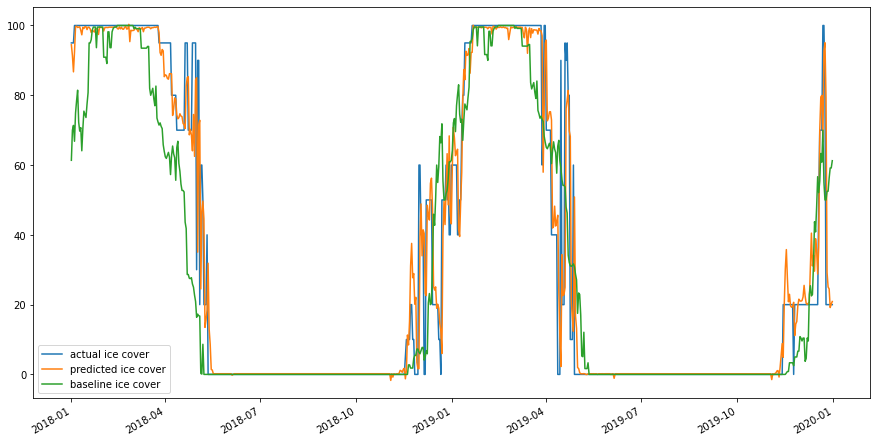

In [62]:
# Overlaying the 2018 and 2019 predictions and baseline on top of actual data

plt.figure(figsize=(15,8))
df_subset_2020 = df_plot_final.loc['2018-01-01':'2020-12-31']
df_subset = df_plot_final.loc['2018-01-01':'2019-12-31']
df_subset['SWPM'].plot(label = 'actual ice cover')
df_subset['SWPM_Pred'].plot(label = 'predicted ice cover')
df_subset['SWPM_Baseline'].plot(label = 'baseline ice cover')
plt.legend(loc="lower left")

In [63]:
df_swpm4_2018_2019 = df_subset_2020

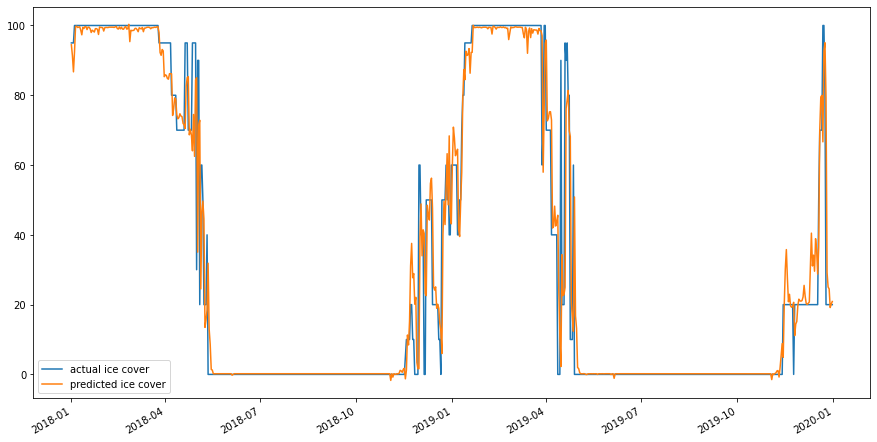

In [64]:
# Overlaying the 2018 and 2019 predictions on top of actual data

plt.figure(figsize=(15,8))
df_subset = df_plot_final.loc['2018-01-01':'2019-12-31']
df_subset['SWPM'].plot(label = 'actual ice cover')
df_subset['SWPM_Pred'].plot(label = 'predicted ice cover')
plt.legend(loc="lower left")

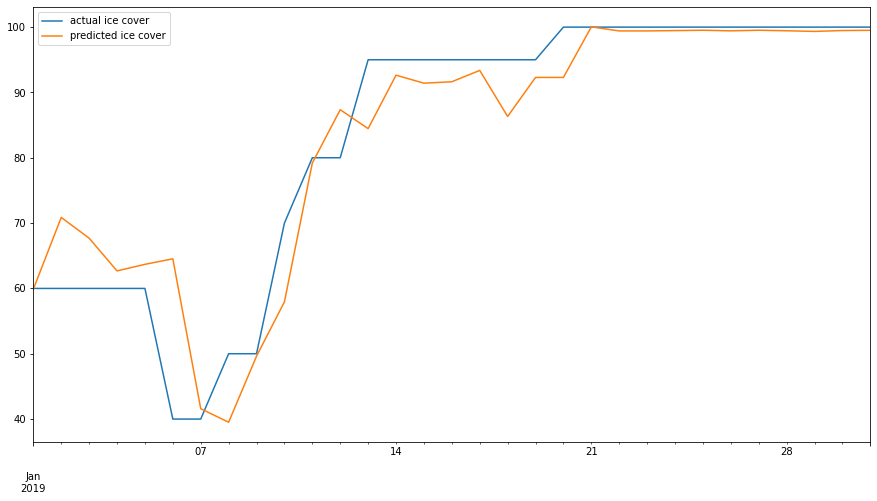

In [65]:
# Overlaying January 2019 predictions on top of actual data for January 2019

plt.figure(figsize=(15,8))
df_subset = df_test.loc['2019-01-01':'2019-01-31']
df_subset['SWPM'].plot(label = 'actual ice cover')
df_subset['SWPM_Pred'].plot(label = 'predicted ice cover')
plt.legend(loc="upper left")

In [66]:
### XGBoost model to forecast the ice for the next 14 days. Here we select 2019-02-01 as the split date

split_date = '2019-02-01'

df_merge_1 = df_merge[['SWPM', 'Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5',  
                      'ATMP_RM_4', 'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 'ATMP', 'Ice_lag_3','Ice_lag_4', 'Ice_lag_5']]

df_merge_train = df_merge_1.loc[df_merge.index < split_date].copy()
df_merge_test = df_merge_1.loc[df_merge.index == split_date].copy()

X_train = df_merge_train.drop(['SWPM'], axis = 1)
X_test = df_merge_test.drop(['SWPM'], axis = 1)
y_train = df_merge_train['SWPM']
y_test = df_merge_test['SWPM']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

(2923, 13) (2923,)
(1, 13) (1,)
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   14.8s finished


0.9261329394931377
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.8}


In [67]:
### Predict ice cover on the day of the test data

y_test_pred = xgb_grid.predict(X_test)

y_test_pred

array([99.23252], dtype=float32)

In [68]:
### Actual ice cover on the day of the test data

y_test

2019-02-01    99.998466
Name: SWPM, dtype: float64

In [69]:
## calculating the mean absolute error

print(mean_absolute_error(y_test, y_test_pred))

0.7659454345703125


In [70]:
X_test.columns

Index(['Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5', 'ATMP_RM_4',
       'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 'ATMP',
       'Ice_lag_3', 'Ice_lag_4', 'Ice_lag_5'],
      dtype='object')

In [71]:
######### Using the predicted value on any date as ground truth and forecasting for next 14 days #################

for i in range(1, 15):
    X_test['Ice_lag_5'] = X_test['Ice_lag_4']
    X_test['Ice_lag_4'] = X_test['Ice_lag_3']
    X_test['Ice_lag_3'] = X_test['Ice_lag_2']
    X_test['Ice_lag_2'] = X_test['Ice_lag_1']
    X_test['Ice_lag_1'] = y_test_pred
    
    X_test['Ice_RM_3'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3']])
    X_test['Ice_RM_4'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], X_test['Ice_lag_4']])
    X_test['Ice_RM_5'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], 
                              X_test['Ice_lag_4'], X_test['Ice_lag_5']])
    
    res = (datetime.strptime(split_date, '%Y-%m-%d') + timedelta(days=i)).strftime('%Y-%m-%d')
    
    df_merge_test = df_merge_1.loc[df_merge.index == res].copy()
    
    y_test = df_merge_test['SWPM']
    
    y_test_pred = xgb_grid.predict(X_test)
    
    print(res, y_test, y_test_pred)

2019-02-02 2019-02-02    99.998466
Name: SWPM, dtype: float64 [99.23252]
2019-02-03 2019-02-03    99.998466
Name: SWPM, dtype: float64 [99.23252]
2019-02-04 2019-02-04    99.998466
Name: SWPM, dtype: float64 [99.23252]
2019-02-05 2019-02-05    99.998466
Name: SWPM, dtype: float64 [99.23252]
2019-02-06 2019-02-06    99.998466
Name: SWPM, dtype: float64 [99.23252]
2019-02-07 2019-02-07    99.998466
Name: SWPM, dtype: float64 [99.23252]
2019-02-08 2019-02-08    99.998466
Name: SWPM, dtype: float64 [99.23252]
2019-02-09 2019-02-09    99.998466
Name: SWPM, dtype: float64 [99.23252]
2019-02-10 2019-02-10    99.998466
Name: SWPM, dtype: float64 [99.23252]
2019-02-11 2019-02-11    99.998466
Name: SWPM, dtype: float64 [99.23252]
2019-02-12 2019-02-12    99.998466
Name: SWPM, dtype: float64 [99.23252]
2019-02-13 2019-02-13    99.998466
Name: SWPM, dtype: float64 [99.23252]
2019-02-14 2019-02-14    99.998466
Name: SWPM, dtype: float64 [99.23252]
2019-02-15 2019-02-15    99.998466
Name: SWPM, dtyp

In [72]:
print(mean_absolute_error(y_test, y_test_pred))

0.7659454345703125


In [73]:
######### Using the predicted value on any date as ground truth and forecasting for next 7 days #################

for i in range(1, 8):
    X_test['Ice_lag_5'] = X_test['Ice_lag_4']
    X_test['Ice_lag_4'] = X_test['Ice_lag_3']
    X_test['Ice_lag_3'] = X_test['Ice_lag_2']
    X_test['Ice_lag_2'] = X_test['Ice_lag_1']
    X_test['Ice_lag_1'] = y_test_pred
    
    X_test['Ice_RM_3'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3']])
    X_test['Ice_RM_4'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], X_test['Ice_lag_4']])
    X_test['Ice_RM_5'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], 
                              X_test['Ice_lag_4'], X_test['Ice_lag_5']])
    
    res = (datetime.strptime(split_date, '%Y-%m-%d') + timedelta(days=i)).strftime('%Y-%m-%d')
    
    df_merge_test = df_merge_1.loc[df_merge.index == res].copy()
    
    y_test = df_merge_test['SWPM']
    
    y_test_pred = xgb_grid.predict(X_test)
    
    print(res, y_test, y_test_pred)

2019-02-02 2019-02-02    99.998466
Name: SWPM, dtype: float64 [99.23252]
2019-02-03 2019-02-03    99.998466
Name: SWPM, dtype: float64 [99.23252]
2019-02-04 2019-02-04    99.998466
Name: SWPM, dtype: float64 [99.23252]
2019-02-05 2019-02-05    99.998466
Name: SWPM, dtype: float64 [99.23252]
2019-02-06 2019-02-06    99.998466
Name: SWPM, dtype: float64 [99.23252]
2019-02-07 2019-02-07    99.998466
Name: SWPM, dtype: float64 [99.23252]
2019-02-08 2019-02-08    99.998466
Name: SWPM, dtype: float64 [99.23252]


In [74]:
df_merge['year'] = pd.DatetimeIndex(df_merge.index).year
df_merge['month'] = pd.DatetimeIndex(df_merge.index).month
df_merge['day'] = pd.DatetimeIndex(df_merge.index).day
df_merge.head()

,WSPD,GST,PRES,ATMP,SWPM,WDIR_New,Wind_North-West,Wind_South-East,Wind_South-West,ATMP_lag_1,...,ATMP_RM_3,ATMP_RM_4,ATMP_RM_5,Ice_RM_3,Ice_RM_4,Ice_RM_5,PRES_zscore,year,month,day
2007-01-01,5.865417,8.043333,1002.353975,2.142500,4.997253,28.012605,0,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.592357,2007,1,1
2007-01-02,5.221667,6.771250,1019.660833,1.710879,4.997253,76.958333,0,0,1,2.142500,...,NaN,NaN,NaN,NaN,NaN,NaN,0.586552,2007,1,2
2007-01-03,5.047083,6.806667,1011.819167,3.328750,4.997253,30.754167,0,0,1,1.710879,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.400703,2007,1,3
2007-01-04,3.697500,5.389167,1004.928750,5.199167,4.997253,16.287500,0,0,1,3.328750,...,2.394043,NaN,NaN,4.997253,NaN,NaN,-1.268197,2007,1,4
2007-01-05,2.765833,3.684167,1001.175107,5.097917,3.997803,28.408333,0,0,1,5.199167,...,3.412932,3.095324,NaN,4.997253,4.997253,NaN,-1.740775,2007,1,5


In [75]:
########## Freezing Phase: Nov 25 - Jan 30
########## Stable Phase: Jan 31 - Mar 25
########## Melting Phase: Mar 26 - May 30
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_freezing = df_merge[df_merge['month'].isin([11, 12, 1])]
df_freezing = df_freezing[~((df_freezing['month'] == 11) & (df_freezing['day'] < 1))]
df_freezing = df_freezing[~((df_freezing['month'] == 1) & (df_freezing['day'] > 14))]

In [76]:
df_stable = df_merge[df_merge['month'].isin([1, 2, 3])]
df_stable = df_stable[~((df_stable['month'] == 1) & (df_stable['day'] < 15))]
df_stable = df_stable[~((df_stable['month'] == 3) & (df_stable['day'] > 25))]

In [77]:
df_melting = df_merge[df_merge['month'].isin([3, 4, 5])]
df_melting = df_melting[~((df_melting['month'] == 3) & (df_melting['day'] < 26))]
df_melting = df_melting[~((df_melting['month'] == 5) & (df_melting['day'] > 10))]

In [78]:
df_freezing.head()

,WSPD,GST,PRES,ATMP,SWPM,WDIR_New,Wind_North-West,Wind_South-East,Wind_South-West,ATMP_lag_1,ATMP_lag_2,ATMP_lag_3,ATMP_lag_4,ATMP_lag_5,Ice_lag_1,Ice_lag_2,Ice_lag_3,Ice_lag_4,Ice_lag_5,ATMP_RM_3,ATMP_RM_4,ATMP_RM_5,Ice_RM_3,Ice_RM_4,Ice_RM_5,PRES_zscore,year,month,day
2007-01-01,5.865417,8.043333,1002.353975,2.142500,4.997253,28.012605,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.592357,2007,1,1
2007-01-02,5.221667,6.771250,1019.660833,1.710879,4.997253,76.958333,0,0,1,2.142500,NaN,NaN,NaN,NaN,4.997253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.586552,2007,1,2
2007-01-03,5.047083,6.806667,1011.819167,3.328750,4.997253,30.754167,0,0,1,1.710879,2.142500,NaN,NaN,NaN,4.997253,4.997253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.400703,2007,1,3
2007-01-04,3.697500,5.389167,1004.928750,5.199167,4.997253,16.287500,0,0,1,3.328750,1.710879,2.142500,NaN,NaN,4.997253,4.997253,4.997253,NaN,NaN,2.394043,NaN,NaN,4.997253,NaN,NaN,-1.268197,2007,1,4
2007-01-05,2.765833,3.684167,1001.175107,5.097917,3.997803,28.408333,0,0,1,5.199167,3.328750,1.710879,2.1425,NaN,4.997253,4.997253,4.997253,4.997253,NaN,3.412932,3.095324,NaN,4.997253,4.997253,NaN,-1.740775,2007,1,5


#### Training XGBoost Model on freezing period - SWPM4

In [79]:
# Separating the Independent and dependent variables

X = df_freezing.drop(['SWPM'], axis = 1)
y = df_freezing['SWPM']

X = X.drop(['year', 'month', 'day'], axis = 1)

In [80]:
########## Freezing Phase: Dec 01 – Jan 14
########## Stable Phase: Jan 15 – Apr 05
########## Melting Phase: Apr 06 – May 30
X_train = X['2007-11-01':'2015-01-14']
X_test = X['2016-11-01':'2020-01-14']
y_train = y['2007-11-01':'2015-01-14']
y_test = y['2016-11-01':'2020-01-14']
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(600, 25) (600,)
(300, 25) (300,)


In [81]:
# Running the XGBoost regressor with a wide range of hyper parameters and 5 CV timeseries splits

t0 = time.time()

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3, 4],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

tF = time.time()

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

print('Time to train = %.2f seconds' % (tF - t0))

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    4.0s


0.7792229588934017
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.7}
Time to train = 9.95 seconds


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    9.8s finished


In [82]:
# Predicting on the training data and calculating the mean absolute error

y_train_pred = xgb_grid.predict(X_train)

print(mean_absolute_error(y_train, y_train_pred))

4.271717952722684


In [83]:
# Predicting on the testation data and calculating the mean absolute error

y_test_pred = xgb_grid.predict(X_test)
y_test_pred[y_test_pred < 0] = 0

print(mean_absolute_error(y_test, y_test_pred))

6.9946522420458495


In [84]:
df_train = X_train.copy()
df_train['y_train'] = y_train
df_train['y_train_pred'] = y_train_pred

df_test = X_test.copy()
df_test['y_test'] = y_test
df_test['y_test_pred'] = y_test_pred

In [85]:
# Calculating variable importance as per the XGBoost model.

var_importance = pd.DataFrame(xgb_grid.best_estimator_.feature_importances_)
features = pd.DataFrame(X_test.columns)
df_var_imp = pd.concat([features, var_importance], axis = 1)
df_var_imp.columns = ['feature', 'importance']
df_var_imp = df_var_imp.sort_values(by = ['importance'], ascending = False)
df_var_imp = df_var_imp.set_index(['feature'])

In [86]:
# Displaying the variable importance

#%matplotlib inline
#fig, ax = plt.subplots(figsize=(20, 15))
#plt.figure(figsize=(10,10))
#df_var_imp['importance'].plot(kind = 'barh')

In [87]:
print(df_var_imp)

                 importance
feature                    
Ice_lag_1          0.414168
Ice_RM_4           0.144183
Ice_RM_3           0.128207
Ice_RM_5           0.053889
Ice_lag_5          0.029462
Wind_South-West    0.021514
Wind_South-East    0.017698
ATMP               0.017537
ATMP_RM_3          0.016204
Ice_lag_2          0.014944
ATMP_lag_1         0.014753
ATMP_RM_5          0.014078
ATMP_lag_4         0.013526
Ice_lag_4          0.012772
Ice_lag_3          0.011845
ATMP_RM_4          0.011670
PRES               0.010437
ATMP_lag_5         0.010307
WSPD               0.010078
WDIR_New           0.008815
ATMP_lag_3         0.008560
ATMP_lag_2         0.007400
Wind_North-West    0.004336
GST                0.003617
PRES_zscore        0.000000


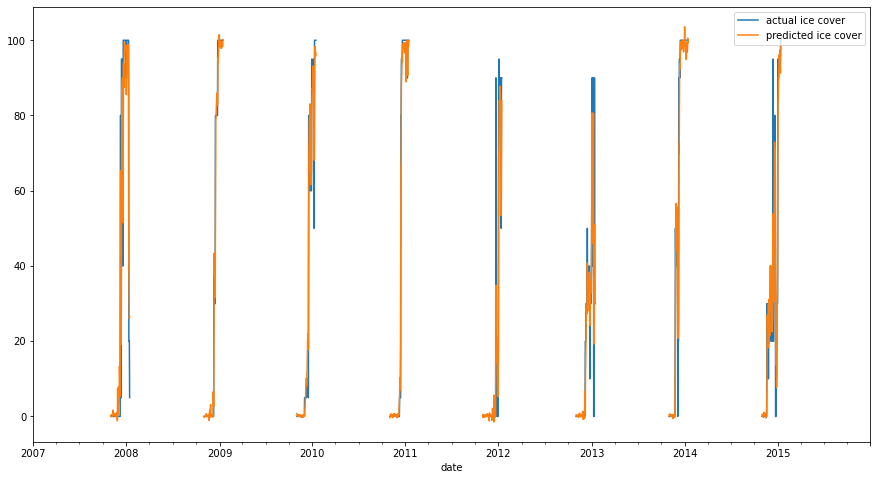

In [88]:
y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index()
y_train.columns = ['date', 'SWPM']

y_train_pred = pd.DataFrame(y_train_pred)
y_train_pred['date'] = y_train['date']
y_train_pred.columns = ['SWPM', 'date']

from datetime import datetime
df_date = pd.DataFrame(pd.date_range(start="2007-01-01",end="2015-12-31"))
df_date.columns = ['date']

y_train = pd.merge(df_date, y_train, on = 'date', how = 'outer')

y_train_pred = pd.merge(df_date, y_train_pred, on = 'date', how = 'outer')
y_train_pred

# Overlaying the training predictions on top of training data
plt.figure(figsize=(15,8))

y_train = y_train.set_index('date')
y_train_pred = y_train_pred.set_index('date')
y_train['SWPM'].plot(label = 'actual ice cover')
y_train_pred['SWPM'].plot(label = 'predicted ice cover')
plt.legend(loc="upper right")

In [89]:
### XGBoost model to forecast the ice for the next 14 days. Here we select 2019-01-01 as the 
### test data set.

split_date = '2019-01-01'

df_freeze_1 = df_freezing[['SWPM', 'Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5', 
                           'ATMP_RM_4', 'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 
                           'ATMP', 'Ice_lag_3','Ice_lag_4', 'Ice_lag_5']]

df_freeze_train = df_freeze_1.loc[df_freezing.index < split_date].copy()
df_freeze_test = df_freeze_1.loc[df_freezing.index == split_date].copy()

X_train = df_freeze_train.drop(['SWPM'], axis = 1)
X_test = df_freeze_test.drop(['SWPM'], axis = 1)
y_train = df_freeze_train['SWPM']
y_test = df_freeze_test['SWPM']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

(900, 13) (900,)
(1, 13) (1,)
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s


0.8470787756323894
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.7}


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    4.4s finished


In [90]:
### Predict ice cover on the day of the test data

y_test_pred = xgb_grid.predict(X_test)

y_test_pred

array([60.723053], dtype=float32)

In [91]:
### Actual ice cover on the day of the test data

y_test

2019-01-01    59.997559
Name: SWPM, dtype: float64

In [92]:
## calculating the mean absolute error

print(mean_absolute_error(y_test, y_test_pred))

0.725494384765625


In [93]:
X_test.columns

Index(['Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5', 'ATMP_RM_4',
       'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 'ATMP',
       'Ice_lag_3', 'Ice_lag_4', 'Ice_lag_5'],
      dtype='object')

In [94]:
######### Using the predicted value on any date as ground truth and forecasting for next 14 days #################

for i in range(1, 15):
    X_test['Ice_lag_5'] = X_test['Ice_lag_4']
    X_test['Ice_lag_4'] = X_test['Ice_lag_3']
    X_test['Ice_lag_3'] = X_test['Ice_lag_2']
    X_test['Ice_lag_2'] = X_test['Ice_lag_1']
    X_test['Ice_lag_1'] = y_test_pred
    
    X_test['Ice_RM_3'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3']])
    X_test['Ice_RM_4'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], X_test['Ice_lag_4']])
    X_test['Ice_RM_5'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], 
                              X_test['Ice_lag_4'], X_test['Ice_lag_5']])
    
    res = (datetime.strptime(split_date, '%Y-%m-%d') + timedelta(days=i)).strftime('%Y-%m-%d')
    
    df_freeze_test = df_freeze_1.loc[df_freeze_1.index == res].copy()
    
    y_test = df_freeze_test['SWPM']
    
    y_test_pred = xgb_grid.predict(X_test)
    
    print(res, y_test, y_test_pred)

2019-01-02 2019-01-02    59.997559
Name: SWPM, dtype: float64 [60.20411]
2019-01-03 2019-01-03    59.997559
Name: SWPM, dtype: float64 [66.135254]
2019-01-04 2019-01-04    59.997559
Name: SWPM, dtype: float64 [70.15721]
2019-01-05 2019-01-05    59.997559
Name: SWPM, dtype: float64 [69.97605]
2019-01-06 2019-01-06    40.000919
Name: SWPM, dtype: float64 [69.66735]
2019-01-07 2019-01-07    40.000919
Name: SWPM, dtype: float64 [69.66735]
2019-01-08 2019-01-08    50.003052
Name: SWPM, dtype: float64 [68.78256]
2019-01-09 2019-01-09    50.003052
Name: SWPM, dtype: float64 [68.78256]
2019-01-10 2019-01-10    69.999687
Name: SWPM, dtype: float64 [68.78256]
2019-01-11 2019-01-11    80.001831
Name: SWPM, dtype: float64 [68.78256]
2019-01-12 2019-01-12    80.001831
Name: SWPM, dtype: float64 [68.78256]
2019-01-13 2019-01-13    95.001221
Name: SWPM, dtype: float64 [68.78256]
2019-01-14 2019-01-14    95.001221
Name: SWPM, dtype: float64 [68.78256]
2019-01-15 Series([], Name: SWPM, dtype: float64) 

#### Training XGBoost Model on stable period - SWPM4

In [95]:
# Separating the Independent and dependent variables

X = df_stable.drop(['SWPM'], axis = 1)
y = df_stable['SWPM']

X = X.drop(['year', 'month', 'day'], axis = 1)

In [96]:
########## Freezing Phase: Nov 01 – Jan 14
########## Stable Phase: Jan 15 – Mar 25
########## Melting Phase: Mar 26 – May 10
X_train = X['2007-01-15':'2015-03-25']
X_test = X['2016-01-15':'2020-03-25']
y_train = y['2007-01-15':'2015-03-25']
y_test = y['2016-01-15':'2020-03-25']
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(617, 25) (617,)
(352, 25) (352,)


In [97]:
# Running the XGBoost regressor with a wide range of hyper parameters and 5 CV timeseries splits

t0 = time.time()

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3, 4],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0, 0.8],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

tF = time.time()

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
print('Time to train = %.2f seconds' % (tF - t0))

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   28.0s finished


-0.04816050944735144
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror', 'subsample': 0.8}
Time to train = 28.46 seconds


In [98]:
# Predicting on the training data and calculating the mean absolute error

y_train_pred = xgb_grid.predict(X_train)

print(mean_absolute_error(y_train, y_train_pred))

0.5594449808377308


In [99]:
# Predicting on the testation data and calculating the mean absolute error

y_test_pred = xgb_grid.predict(X_test)
y_test_pred[y_test_pred < 0] = 0

print(mean_absolute_error(y_test, y_test_pred))

3.8807876611297782


In [100]:
df_train = X_train.copy()
df_train['y_train'] = y_train
df_train['y_train_pred'] = y_train_pred

df_test = X_test.copy()
df_test['y_test'] = y_test
df_test['y_test_pred'] = y_test_pred

In [101]:
# Calculating variable importance as per the XGBoost model.

var_importance = pd.DataFrame(xgb_grid.best_estimator_.feature_importances_)
features = pd.DataFrame(X_test.columns)
df_var_imp = pd.concat([features, var_importance], axis = 1)
df_var_imp.columns = ['feature', 'importance']
df_var_imp = df_var_imp.sort_values(by = ['importance'], ascending = False)
df_var_imp = df_var_imp.set_index(['feature'])

In [102]:
# Displaying the variable importance

#%matplotlib inline
#fig, ax = plt.subplots(figsize=(20, 15))
#plt.figure(figsize=(10,10))
#df_var_imp['importance'].plot(kind = 'barh')

In [103]:
print(df_var_imp)

                 importance
feature                    
Ice_lag_1          0.465814
Ice_RM_3           0.060356
ATMP_lag_3         0.050117
ATMP_lag_5         0.049257
ATMP_lag_4         0.045232
WDIR_New           0.037347
WSPD               0.036403
ATMP_RM_3          0.031508
ATMP               0.030198
Ice_lag_2          0.027484
ATMP_lag_2         0.025489
ATMP_RM_5          0.025047
PRES               0.019150
Ice_RM_4           0.015739
Ice_lag_3          0.014691
ATMP_lag_1         0.012721
Ice_lag_5          0.012672
ATMP_RM_4          0.008832
GST                0.008448
Ice_RM_5           0.006776
Wind_South-West    0.005475
Ice_lag_4          0.005388
Wind_South-East    0.004592
Wind_North-West    0.001265
PRES_zscore        0.000000


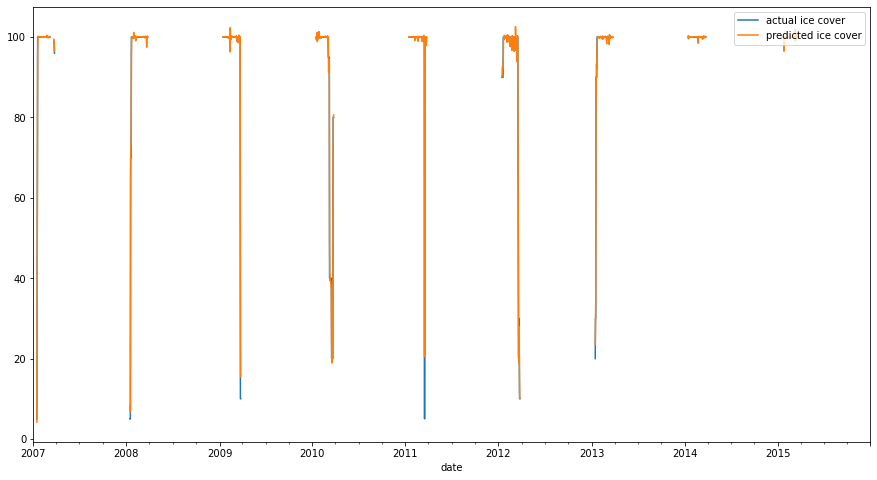

In [104]:
y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index()
y_train.columns = ['date', 'SWPM']

y_train_pred = pd.DataFrame(y_train_pred)
y_train_pred['date'] = y_train['date']
y_train_pred.columns = ['SWPM', 'date']

from datetime import datetime
df_date = pd.DataFrame(pd.date_range(start="2007-01-01",end="2015-12-31"))
df_date.columns = ['date']

y_train = pd.merge(df_date, y_train, on = 'date', how = 'outer')

y_train_pred = pd.merge(df_date, y_train_pred, on = 'date', how = 'outer')
y_train_pred

# Overlaying the training predictions on top of training data
plt.figure(figsize=(15,8))

y_train = y_train.set_index('date')
y_train_pred = y_train_pred.set_index('date')
y_train['SWPM'].plot(label = 'actual ice cover')
y_train_pred['SWPM'].plot(label = 'predicted ice cover')
plt.legend(loc="upper right")

In [105]:
### XGBoost model to forecast the ice for the next 14 days. Here we select 2019-03-01 as the 
### test data set.

split_date = '2019-03-01'

df_stable_1 = df_stable[['SWPM', 'Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5', 
                         'ATMP_RM_4', 'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 
                         'ATMP', 'Ice_lag_3','Ice_lag_4', 'Ice_lag_5']]

df_stable_train = df_stable_1.loc[df_stable_1.index < split_date].copy()
df_stable_test = df_stable_1.loc[df_stable_1.index == split_date].copy()

X_train = df_stable_train.drop(['SWPM'], axis = 1)
X_test = df_stable_test.drop(['SWPM'], axis = 1)
y_train = df_stable_train['SWPM']
y_test = df_stable_test['SWPM']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3, 4],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0, 0.6],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

(873, 13) (873,)
(1, 13) (1,)
Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.6s


-0.7717980935379721
{'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.7}


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   20.2s finished


In [106]:
### Predict ice cover on the day of the testation data

y_test_pred = xgb_grid.predict(X_test)

y_test_pred

array([99.31949], dtype=float32)

In [107]:
### Actual ice cover on the day of the testation data

y_test

2019-03-01    99.998466
Name: SWPM, dtype: float64

In [108]:
## calculating the mean absolute error

print(mean_absolute_error(y_test, y_test_pred))

0.6789779663085938


In [109]:
X_test

,Ice_lag_1,Ice_RM_3,Ice_RM_4,Ice_RM_5,ATMP_RM_4,ATMP_RM_3,ATMP_RM_5,Ice_lag_2,ATMP_lag_4,ATMP,Ice_lag_3,Ice_lag_4,Ice_lag_5
2019-03-01,99.998466,99.998466,99.998466,99.998466,-12.109758,-13.176298,-9.783475,99.998466,-8.910138,-8.700442,99.998466,99.998466,99.998466


In [110]:
######### Using the predicted value on any date as ground truth and forecasting for next 14 days #################

for i in range(1, 15):
    X_test['Ice_lag_5'] = X_test['Ice_lag_4']
    X_test['Ice_lag_4'] = X_test['Ice_lag_3']
    X_test['Ice_lag_3'] = X_test['Ice_lag_2']
    X_test['Ice_lag_2'] = X_test['Ice_lag_1']
    X_test['Ice_lag_1'] = y_test_pred
    
    X_test['Ice_RM_3'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3']])
    X_test['Ice_RM_4'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], X_test['Ice_lag_4']])
    X_test['Ice_RM_5'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], 
                              X_test['Ice_lag_4'], X_test['Ice_lag_5']])
    
    res = (datetime.strptime(split_date, '%Y-%m-%d') + timedelta(days=i)).strftime('%Y-%m-%d')
    
    df_stable_test = df_stable_1.loc[df_stable_1.index == res].copy()
    
    y_test = df_stable_test['SWPM']
    
    y_test_pred = xgb_grid.predict(X_test)
    
    print(res, y_test, y_test_pred)

2019-03-02 2019-03-02    99.998466
Name: SWPM, dtype: float64 [99.31949]
2019-03-03 2019-03-03    99.998466
Name: SWPM, dtype: float64 [98.84904]
2019-03-04 2019-03-04    99.998466
Name: SWPM, dtype: float64 [98.597496]
2019-03-05 2019-03-05    99.998466
Name: SWPM, dtype: float64 [98.68868]
2019-03-06 2019-03-06    99.998466
Name: SWPM, dtype: float64 [98.68868]
2019-03-07 2019-03-07    99.998466
Name: SWPM, dtype: float64 [98.37101]
2019-03-08 2019-03-08    99.998466
Name: SWPM, dtype: float64 [98.200554]
2019-03-09 2019-03-09    99.998466
Name: SWPM, dtype: float64 [98.200554]
2019-03-10 2019-03-10    99.998466
Name: SWPM, dtype: float64 [98.200554]
2019-03-11 2019-03-11    99.998466
Name: SWPM, dtype: float64 [98.200554]
2019-03-12 2019-03-12    99.998466
Name: SWPM, dtype: float64 [98.200554]
2019-03-13 2019-03-13    99.998466
Name: SWPM, dtype: float64 [98.200554]
2019-03-14 2019-03-14    99.998466
Name: SWPM, dtype: float64 [98.200554]
2019-03-15 2019-03-15    99.998466
Name: SW

In [111]:
y_test

2019-03-15    99.998466
Name: SWPM, dtype: float64

#### Training XGBoost Model on melting period - SWPM4

In [112]:
# Separating the Independent and dependent variables

X = df_melting.drop(['SWPM'], axis = 1)
y = df_melting['SWPM']

X = X.drop(['year', 'month', 'day'], axis = 1)

In [113]:
########## Freezing Phase: Nov 01 – Jan 14
########## Stable Phase: Jan 15 – Mar 25
########## Melting Phase: Mar 26 – May 10
X_train = X['2007-03-26':'2015-05-10']
X_test = X['2016-03-26':'2020-05-10']
y_train = y['2007-03-26':'2015-05-10']
y_test = y['2016-03-26':'2020-05-10']
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(414, 25) (414,)
(230, 25) (230,)


In [114]:
# Running the XGBoost regressor with a wide range of hyper parameters and 5 CV timeseries splits

t0 = time.time()

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3, 4],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0, 0.8],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

tF = time.time()

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
print('Time to train = %.2f seconds' % (tF - t0))

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.8s


-0.5243501689178164
{'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.7}
Time to train = 21.92 seconds


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   21.7s finished


In [115]:
# Predicting on the training data and calculating the mean absolute error

y_train_pred = xgb_grid.predict(X_train)

print(mean_absolute_error(y_train, y_train_pred))

19.968273894150474


In [116]:
# Predicting on the testation data and calculating the mean absolute error

y_test_pred = xgb_grid.predict(X_test)
y_test_pred[y_test_pred < 0] = 0

print(mean_absolute_error(y_test, y_test_pred))

16.56578652444093


In [117]:
df_train = X_train.copy()
df_train['y_train'] = y_train
df_train['y_train_pred'] = y_train_pred

df_test = X_test.copy()
df_test['y_test'] = y_test
df_test['y_test_pred'] = y_test_pred

In [118]:
# Calculating variable importance as per the XGBoost model.

var_importance = pd.DataFrame(xgb_grid.best_estimator_.feature_importances_)
features = pd.DataFrame(X_test.columns)
df_var_imp = pd.concat([features, var_importance], axis = 1)
df_var_imp.columns = ['feature', 'importance']
df_var_imp = df_var_imp.sort_values(by = ['importance'], ascending = False)
df_var_imp = df_var_imp.set_index(['feature'])

In [119]:
# Displaying the variable importance

#%matplotlib inline
#fig, ax = plt.subplots(figsize=(20, 15))
#plt.figure(figsize=(10,10))
#df_var_imp['importance'].plot(kind = 'barh')

In [120]:
print(df_var_imp)

                 importance
feature                    
Ice_lag_1          0.569203
Ice_RM_3           0.041791
ATMP_RM_4          0.029153
Ice_RM_4           0.028702
Ice_RM_5           0.027499
ATMP_RM_5          0.023889
ATMP_RM_3          0.023505
ATMP_lag_5         0.022426
ATMP_lag_3         0.022161
Ice_lag_4          0.020080
ATMP_lag_2         0.017917
Wind_South-East    0.017824
Wind_South-West    0.017327
ATMP_lag_1         0.017144
GST                0.016308
Ice_lag_3          0.016252
PRES               0.016022
ATMP_lag_4         0.014690
Ice_lag_2          0.014427
Ice_lag_5          0.013878
ATMP               0.012327
WDIR_New           0.012185
WSPD               0.005288
Wind_North-West    0.000000
PRES_zscore        0.000000


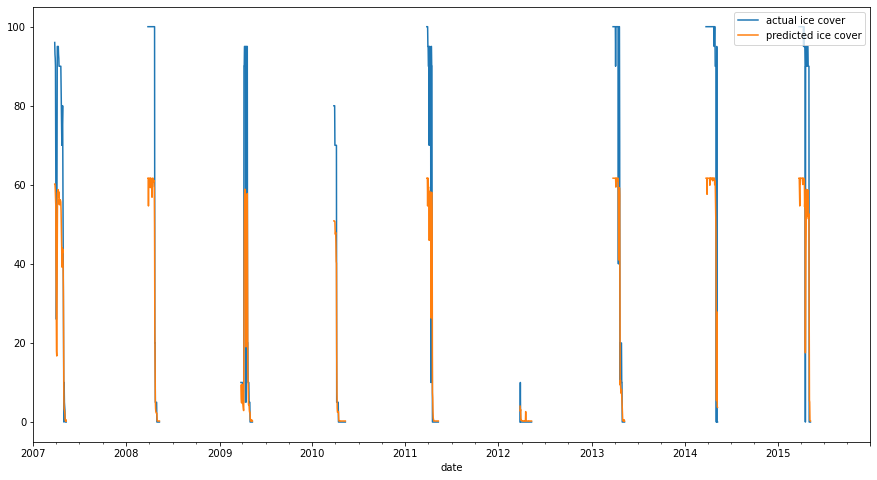

In [121]:
y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index()
y_train.columns = ['date', 'SWPM']

y_train_pred = pd.DataFrame(y_train_pred)
y_train_pred['date'] = y_train['date']
y_train_pred.columns = ['SWPM', 'date']

from datetime import datetime
df_date = pd.DataFrame(pd.date_range(start="2007-01-01",end="2015-12-31"))
df_date.columns = ['date']

y_train = pd.merge(df_date, y_train, on = 'date', how = 'outer')

y_train_pred = pd.merge(df_date, y_train_pred, on = 'date', how = 'outer')
y_train_pred

# Overlaying the training predictions on top of training data
plt.figure(figsize=(15,8))

y_train = y_train.set_index('date')
y_train_pred = y_train_pred.set_index('date')
y_train['SWPM'].plot(label = 'actual ice cover')
y_train_pred['SWPM'].plot(label = 'predicted ice cover')
plt.legend(loc="upper right")

In [122]:
### XGBoost model to forecast the ice for the next 14 days. Here we select 2019-04-20 as the test data set.

split_date = '2019-04-20'

df_melting_1 = df_melting[['SWPM', 'Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5', 
                           'ATMP_RM_4', 'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 
                           'ATMP', 'Ice_lag_3','Ice_lag_4', 'Ice_lag_5']]

df_melting_train = df_melting_1.loc[df_melting_1.index < split_date].copy()
df_melting_test = df_melting_1.loc[df_melting_1.index == split_date].copy()

X_train = df_melting_train.drop(['SWPM'], axis = 1)
X_test = df_melting_test.drop(['SWPM'], axis = 1)
y_train = df_melting_train['SWPM']
y_test = df_melting_test['SWPM']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3, 4],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0, 0.6],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

(577, 13) (577,)
(1, 13) (1,)
Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   14.3s


0.7807087301011638
{'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.7}


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   18.2s finished


In [123]:
### Predict ice cover on the day of the testation data

y_test_pred = xgb_grid.predict(X_test)

y_test_pred

array([64.42071], dtype=float32)

In [124]:
### Actual ice cover on the day of the testation data

y_test

2019-04-20    89.996338
Name: SWPM, dtype: float64

In [125]:
## calculating the mean absolute error

print(mean_absolute_error(y_test, y_test_pred))

25.57563018798828


In [126]:
X_test.columns

Index(['Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5', 'ATMP_RM_4',
       'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 'ATMP',
       'Ice_lag_3', 'Ice_lag_4', 'Ice_lag_5'],
      dtype='object')

In [127]:
######### Using the predicted value on any date as ground truth and forecasting for next 14 days #################

for i in range(1, 15):
    X_test['Ice_lag_5'] = X_test['Ice_lag_4']
    X_test['Ice_lag_4'] = X_test['Ice_lag_3']
    X_test['Ice_lag_3'] = X_test['Ice_lag_2']
    X_test['Ice_lag_2'] = X_test['Ice_lag_1']
    X_test['Ice_lag_1'] = y_test_pred
    
    X_test['Ice_RM_3'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3']])
    X_test['Ice_RM_4'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], X_test['Ice_lag_4']])
    X_test['Ice_RM_5'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], 
                              X_test['Ice_lag_4'], X_test['Ice_lag_5']])
    
    res = (datetime.strptime(split_date, '%Y-%m-%d') + timedelta(days=i)).strftime('%Y-%m-%d')
    
    df_melting_test = df_melting_1.loc[df_melting_1.index == res].copy()
    
    y_test = df_melting_test['SWPM']
    
    y_test_pred = xgb_grid.predict(X_test)
    
    print(res, y_test, y_test_pred)

2019-04-21 2019-04-21    95.001221
Name: SWPM, dtype: float64 [64.60694]
2019-04-22 2019-04-22    80.001831
Name: SWPM, dtype: float64 [61.25621]
2019-04-23 2019-04-23    80.001831
Name: SWPM, dtype: float64 [57.27133]
2019-04-24 2019-04-24    10.00214
Name: SWPM, dtype: float64 [54.57495]
2019-04-25 2019-04-25    10.00214
Name: SWPM, dtype: float64 [34.893944]
2019-04-26 2019-04-26    10.00214
Name: SWPM, dtype: float64 [33.43127]
2019-04-27 2019-04-27    59.997559
Name: SWPM, dtype: float64 [33.45941]
2019-04-28 2019-04-28    0.0
Name: SWPM, dtype: float64 [33.85284]
2019-04-29 2019-04-29    0.0
Name: SWPM, dtype: float64 [34.942116]
2019-04-30 2019-04-30    0.0
Name: SWPM, dtype: float64 [34.942116]
2019-05-01 2019-05-01    0.0
Name: SWPM, dtype: float64 [34.942116]
2019-05-02 2019-05-02    0.0
Name: SWPM, dtype: float64 [34.942116]
2019-05-03 2019-05-03    0.0
Name: SWPM, dtype: float64 [34.942116]
2019-05-04 2019-05-04    0.0
Name: SWPM, dtype: float64 [34.942116]


In [128]:
df_swpm4_2018_2019.head()

,SWPM,SWPM_Pred,year,month,day,SWPM_Baseline
2018-01-01,95.001221,94.463196,2018,1,1,61.362525
2018-01-02,95.001221,91.384224,2018,1,2,69.998306
2018-01-03,95.001221,86.711891,2018,1,3,71.362580
2018-01-04,99.998466,92.388489,2018,1,4,66.816154
2018-01-05,99.998466,99.657646,2018,1,5,74.907473


In [129]:
df_swpm4_2018_2019.tail()

,SWPM,SWPM_Pred,year,month,day,SWPM_Baseline
2020-05-19,0.0,0.175648,2020,5,19,0.0
2020-05-20,0.0,0.175648,2020,5,20,0.0
2020-05-21,0.0,0.175648,2020,5,21,0.0
2020-05-22,0.0,0.175648,2020,5,22,0.0
2020-05-23,0.0,0.196830,2020,5,23,0.0


In [130]:
df_swpm4_2018_2019 = df_swpm4_2018_2019.drop(['year', 'month', 'day'], axis = 1)

In [131]:
df_swpm4_2018_2019.head()

,SWPM,SWPM_Pred,SWPM_Baseline
2018-01-01,95.001221,94.463196,61.362525
2018-01-02,95.001221,91.384224,69.998306
2018-01-03,95.001221,86.711891,71.362580
2018-01-04,99.998466,92.388489,66.816154
2018-01-05,99.998466,99.657646,74.907473


In [132]:
df_swpm4_2018_2019.tail()

,SWPM,SWPM_Pred,SWPM_Baseline
2020-05-19,0.0,0.175648,0.0
2020-05-20,0.0,0.175648,0.0
2020-05-21,0.0,0.175648,0.0
2020-05-22,0.0,0.175648,0.0
2020-05-23,0.0,0.196830,0.0


In [133]:
df_swpm4_2018_2019.to_csv(r'C:/Users/sdavedu/Desktop/XGBoost/SWPM4_2018_2019.csv', index = True, header=True)

In [134]:
df_icedur_pred_swpm4.head()

,year,Ice_off_date,Ice_on_date,duration
0,2007,2007-05-04,2007-12-06,142 days
1,2008,2008-04-26,2008-12-11,113 days
2,2009,2009-04-03,2009-12-09,122 days
3,2010,2010-04-10,2010-12-12,130 days
4,2011,2011-04-21,2011-12-23,100 days


In [135]:
df_icedur_pred_swpm4 = df_icedur_pred_swpm4.drop(['duration'],axis=1)

In [136]:
df_icedur_pred_swpm4.head()

,year,Ice_off_date,Ice_on_date
0,2007,2007-05-04,2007-12-06
1,2008,2008-04-26,2008-12-11
2,2009,2009-04-03,2009-12-09
3,2010,2010-04-10,2010-12-12
4,2011,2011-04-21,2011-12-23


In [137]:
df_icedur_pred_swpm4.to_csv(r'C:/Users/sdavedu/Desktop/XGBoost/SWPM4_icedur_pred.csv', index = False, header=True)

In [138]:
df_icedur_act_swpm4.head()

,year,Ice_off_date,Ice_on_date,duration
0,2007,2007-05-02,2007-12-09,138 days
1,2008,2008-04-25,2008-12-10,113 days
2,2009,2009-04-02,2009-12-11,118 days
3,2010,2010-04-08,2010-12-14,125 days
4,2011,2011-04-18,2011-12-22,101 days


In [139]:
df_icedur_act_swpm4 = df_icedur_act_swpm4.drop(['duration'],axis=1)

In [140]:
df_icedur_act_swpm4.head()

,year,Ice_off_date,Ice_on_date
0,2007,2007-05-02,2007-12-09
1,2008,2008-04-25,2008-12-10
2,2009,2009-04-02,2009-12-11
3,2010,2010-04-08,2010-12-14
4,2011,2011-04-18,2011-12-22


In [141]:
df_icedur_act_swpm4.to_csv(r'C:/Users/sdavedu/Desktop/XGBoost/SWPM4_icedur_act.csv', index = False, header=True)